## JWST F1000W Stephan's Quintet ERO

Data is setup in a subdirectory that is given in the filter variable below (i.e., "F560W"). Inside this directory, there should be 4 subdirectories called stage0, stage1, stage2, and stage3. The uncal (raw) fits files should be in the stage0 directory.

Author: Karl Gordon

Last modified: 4 Aug 2022

Based on JWebbinar notebooks by Bryan Hilbert, MIRI simulated notebooks by Mattia Libralato, input from various MIRI team members, and input from the jwst pipeline developers.

Uses custom code given in helpers subdirectory.

Extensively tested on MIRI ERO mosaics.

### Variables controling processing and display

In [1]:
filter = "F1500W"
fwhm = 4.4
basename = "jw0273200"

crval = [338.9982251241355, 33.95839892526284]
# rotation = 63.0
# crval = None
rotation = None

# shifts determine from previous runs with treakreg or with other filters
#   analysis using Analyze_teakreg_shifts.ipynb
#   run this notebook after running shortest wavelength dataset with tweakreg=True and align_to_gaia=True
#     and setting all the tile?_shifts to [0.0, 0.0]
#   use the resulting shifts here and set tweakreg=False and align_to_gaia=False
#tile1_shifts = [0.0, 0.0]
#tile2_sfhits = [0.0, 0.0]
#tweakreg = True
#align_to_gaia = True
tile1_shifts = [-0.11869972000626429, -0.13548076355522468]
tile2_shifts = [0.1810914151833745, -0.11778119088380427]
tile3_shifts = [0.24783992350343395, -0.02284685457243522]
tile4_shifts = [-0.07174097028261477, -0.12693356035231074]
tweakreg = False
align_to_gaia = False

# only needed if multiple datasets combined that are taken separately (e.g., weeks apart)
matchbkg = True

# display range for uncalibrated images
drange_raw = [110., 140.]
# display range for calibrated images
drange_cal = [44., 60.]
dmap = "afmhot"  # same as ds9 bb

# specify the linearity file to use if default not desired
# linfile = ""
linfile = None

# specify the flat file to use if default not desired
flatfile = None

run_detector1 = True
run_image2 = True
run_image3 = True

In [2]:
import os
import glob
import copy

from astropy.io import ascii
from astropy.visualization import simple_norm

In [3]:
import astropy
print(astropy.__version__)

5.0.4


In [4]:
os.environ["CRDS_PATH"] = "/home/kgordon/crds_cache"
os.environ["CRDS_SERVER_URL"] = "https://jwst-crds.stsci.edu"

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import ImageGrid

# Use this version for non-interactive plots (easier scrolling of the notebook)
%matplotlib inline

# Use this version (outside of Jupyter Lab) if you want interactive plots
#%matplotlib notebook

# These gymnastics are needed to make the sizes of the figures
# be the same in both the inline and notebook versions
%config InlineBackend.print_figure_kwargs = {'bbox_inches': None}

mpl.rcParams['savefig.dpi'] = 80
mpl.rcParams['figure.dpi'] = 80

In [6]:
# List of possible data quality flags
from jwst.datamodels import dqflags
from jwst import datamodels

from jwst.associations import asn_from_list
from jwst.associations.lib.rules_level2_base import DMSLevel2bBase
from jwst.associations.lib.rules_level3_base import DMS_Level3_Base

# custom helper routines
from helpers.jwst_helpers import show_image, overlay_catalog
from helpers.miri_helpers import miri_detector1, miri_image2, miri_image3
from helpers.miri_clean import fix_rateints_to_rate, shift_cal_wcs

In [7]:
import jwst
print(jwst.__version__)

1.6.2.dev4+g35d5e1d


In [8]:
import stcal
print(stcal.__version__)

1.0.1.dev2+g6262cda


In [9]:
# create stage directories if they do not exist
for k in range(4):
    cpath = f"./{filter}/stage{k}"
    if not os.path.exists(cpath):
        os.makedirs(cpath)

## CALWEBB_DETECTOR1

In [10]:
miri_uncal_files = glob.glob(f"./{filter}/stage0/*uncal.fits")
output_dir = f'./{filter}/stage1'
print(miri_uncal_files)

['./F1500W/stage0/jw02732002001_02105_00006_mirimage_uncal.fits', './F1500W/stage0/jw02732006001_02105_00004_mirimage_uncal.fits', './F1500W/stage0/jw02732002002_02105_00004_mirimage_uncal.fits', './F1500W/stage0/jw02732006001_02105_00002_mirimage_uncal.fits', './F1500W/stage0/jw02732006002_02105_00007_mirimage_uncal.fits', './F1500W/stage0/jw02732002002_02105_00005_mirimage_uncal.fits', './F1500W/stage0/jw02732006001_02105_00005_mirimage_uncal.fits', './F1500W/stage0/jw02732002001_02105_00008_mirimage_uncal.fits', './F1500W/stage0/jw02732002001_02105_00005_mirimage_uncal.fits', './F1500W/stage0/jw02732006001_02105_00007_mirimage_uncal.fits', './F1500W/stage0/jw02732002002_02105_00003_mirimage_uncal.fits', './F1500W/stage0/jw02732002002_02105_00007_mirimage_uncal.fits', './F1500W/stage0/jw02732006002_02105_00001_mirimage_uncal.fits', './F1500W/stage0/jw02732006001_02105_00003_mirimage_uncal.fits', './F1500W/stage0/jw02732002001_02105_00002_mirimage_uncal.fits', './F1500W/stage0/jw02732

In [11]:
if run_detector1:
    miri_detector1(miri_uncal_files, output_dir, linfile=linfile)

2022-08-04 11:57:58,729 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-08-04 11:57:58,730 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-08-04 11:57:58,730 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-08-04 11:57:58,731 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-08-04 11:57:58,731 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-08-04 11:57:58,732 - stpipe 

./F1500W/stage0/jw02732002001_02105_00006_mirimage_uncal.fits


2022-08-04 11:57:58,830 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline running with args ('./F1500W/stage0/jw02732002001_02105_00006_mirimage_uncal.fits',).
2022-08-04 11:57:58,838 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F1500W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': T

2022-08-04 11:58:03,722 - stpipe.Detector1Pipeline.group_scale - INFO - NFRAMES and FRMDIVSR are equal; correction not needed
2022-08-04 11:58:03,722 - stpipe.Detector1Pipeline.group_scale - INFO - Step will be skipped
2022-08-04 11:58:03,725 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale done
2022-08-04 11:58:03,882 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init running with args (<RampModel(2, 30, 1024, 1032) from jw02732002001_02105_00006_mirimage_uncal.fits>,).
2022-08-04 11:58:03,884 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1500W/stage0'}
2022-08-04 11:58:03,903 - stpipe.Detector1Pipeline.dq_init - INFO - Using MASK reference file /home/kgordon/crds_cache/references/jwst/mir

2022-08-04 11:58:41,354 - stpipe.Detector1Pipeline.refpix - INFO - MIRI full frame data
2022-08-04 11:58:41,355 - stpipe.Detector1Pipeline.refpix - INFO - The following parameter is valid for this mode:
2022-08-04 11:58:41,355 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_rows = True
2022-08-04 11:58:41,356 - stpipe.Detector1Pipeline.refpix - INFO - The following parameters are not applicable and are ignored:
2022-08-04 11:58:41,356 - stpipe.Detector1Pipeline.refpix - INFO - use_side_ref_pixels = False
2022-08-04 11:58:41,356 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_columns = False
2022-08-04 11:58:41,357 - stpipe.Detector1Pipeline.refpix - INFO - side_smoothing_length = False
2022-08-04 11:58:41,357 - stpipe.Detector1Pipeline.refpix - INFO - side_gain = False
2022-08-04 11:58:41,360 - stpipe.Detector1Pipeline.refpix - INFO - Subtracting initial read from each integration
2022-08-04 11:58:42,080 - stpipe.Detector1Pipeline.refpix - INFO - Adding initial read back in
202

2022-08-04 11:58:44,637 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2614 pixels with at least one CR from five groups.
2022-08-04 11:58:44,638 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 11:58:44,639 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-08-04 11:58:44,646 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-08-04 11:58:44,659 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2190 pixels with at least one CR from five groups.
2022-08-04 11:58:44,660 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 11:58:44,661 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three gro

2022-08-04 11:58:48,449 - stpipe.Detector1Pipeline.ramp_fit - INFO - Using GAIN reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits
2022-08-04 11:58:48,497 - stpipe.Detector1Pipeline.ramp_fit - INFO - Using algorithm = ols
2022-08-04 11:58:48,497 - stpipe.Detector1Pipeline.ramp_fit - INFO - Using weighting = optimal
2022-08-04 11:58:48,672 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of leading groups that are flagged as DO_NOT_USE: 1
2022-08-04 11:58:48,673 - stpipe.Detector1Pipeline.ramp_fit - INFO - MIRI dataset has all pixels in the final group flagged as DO_NOT_USE.
2022-08-04 11:58:48,673 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of processors used for multiprocessing: 10
2022-08-04 11:58:55,465 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 28
2022-08-04 11:58:55,467 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 2
2022-08-04 11:58:56,130 - stpipe.Detector1Pipeline.ramp_fit 

2022-08-04 11:59:01,721 - stpipe.Detector1Pipeline.rscd - INFO - RscdStep instance created.
2022-08-04 11:59:01,722 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-08-04 11:59:01,723 - stpipe.Detector1Pipeline.firstframe - INFO - FirstFrameStep instance created.
2022-08-04 11:59:01,724 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-08-04 11:59:01,724 - stpipe.Detector1Pipeline.lastframe - INFO - LastFrameStep instance created.
2022-08-04 11:59:01,725 - stpipe - CRITICAL - config: {'

./F1500W/stage0/jw02732006001_02105_00004_mirimage_uncal.fits


2022-08-04 11:59:04,286 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732006001_02105_00004_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-04 11:59:04,290 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-04 11:59:04,292 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-04 11:59:04,294 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-04 11:59:04,295 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-04 11:59:11,849 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1500W/stage0'}
2022-08-04 11:59:11,868 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-04 11:59:12,845 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-04 11:59:13,010 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02732006001_02105_00004_mirimage_uncal.fits>,).
2022-08-04 11:59:13,011 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-08-04 11:59:22,709 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 11:59:22,710 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-08-04 11:59:22,716 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-08-04 11:59:22,833 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-04 11:59:22,838 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2324 pixels with at least one CR from five groups.
2022-08-04 11:59:22,839 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 11:59:22,840 - stpipe.Detector1Pipeline.jump - INFO - From highest out

2022-08-04 11:59:24,348 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-04 11:59:24,428 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1903 pixels with at least one CR from five groups.
2022-08-04 11:59:24,429 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 11:59:24,430 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-04 11:59:24,498 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2315 pixels with at least one CR from five groups.
2022-08-04 11:59:24,499 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 11:59:24,500 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier,

2022-08-04 11:59:40,038 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline done
2022-08-04 11:59:40,045 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-08-04 11:59:40,046 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-08-04 11:59:40,047 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-08-04 11:59:40,047 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-08-04 11:59:40,048 - stpipe.Detector1

./F1500W/stage0/jw02732002002_02105_00004_mirimage_uncal.fits


2022-08-04 11:59:44,610 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732002002_02105_00004_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-04 11:59:44,614 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-04 11:59:44,618 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-04 11:59:44,622 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-04 11:59:44,626 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-04 11:59:50,935 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1500W/stage0'}
2022-08-04 11:59:50,957 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-04 11:59:51,703 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-04 11:59:51,844 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02732002002_02105_00004_mirimage_uncal.fits>,).
2022-08-04 11:59:51,845 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-08-04 11:59:59,230 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 11:59:59,231 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-08-04 11:59:59,285 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-08-04 11:59:59,378 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-08-04 11:59:59,396 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-04 11:59:59,403 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2269 pixels with at least one CR from five groups.
2022-08-04 11:59:59,405 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from fou

2022-08-04 12:00:00,716 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2113 pixels with at least one CR from five groups.
2022-08-04 12:00:00,717 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 12:00:00,718 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-04 12:00:00,718 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2228 pixels with at least one CR from five groups.
2022-08-04 12:00:00,720 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4 pixels with at least one CR from four groups.
2022-08-04 12:00:00,721 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-04 12:00:00,731 - stpipe.Detector1Pipeline.jump - INFO - Working on integratio

2022-08-04 12:00:18,230 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-08-04 12:00:18,232 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-08-04 12:00:18,236 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-08-04 12:00:18,239 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-08-04 12:00:18,240 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-08-04 12:00:18,242 - stpipe 

./F1500W/stage0/jw02732006001_02105_00002_mirimage_uncal.fits


2022-08-04 12:00:18,438 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline running with args ('./F1500W/stage0/jw02732006001_02105_00002_mirimage_uncal.fits',).
2022-08-04 12:00:18,446 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F1500W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': T

2022-08-04 12:00:22,180 - stpipe.Detector1Pipeline.group_scale - INFO - NFRAMES and FRMDIVSR are equal; correction not needed
2022-08-04 12:00:22,181 - stpipe.Detector1Pipeline.group_scale - INFO - Step will be skipped
2022-08-04 12:00:22,186 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale done
2022-08-04 12:00:22,360 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init running with args (<RampModel(2, 30, 1024, 1032) from jw02732006001_02105_00002_mirimage_uncal.fits>,).
2022-08-04 12:00:22,362 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1500W/stage0'}
2022-08-04 12:00:22,402 - stpipe.Detector1Pipeline.dq_init - INFO - Using MASK reference file /home/kgordon/crds_cache/references/jwst/mir

2022-08-04 12:00:35,295 - stpipe.Detector1Pipeline.refpix - INFO - MIRI full frame data
2022-08-04 12:00:35,296 - stpipe.Detector1Pipeline.refpix - INFO - The following parameter is valid for this mode:
2022-08-04 12:00:35,296 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_rows = True
2022-08-04 12:00:35,296 - stpipe.Detector1Pipeline.refpix - INFO - The following parameters are not applicable and are ignored:
2022-08-04 12:00:35,296 - stpipe.Detector1Pipeline.refpix - INFO - use_side_ref_pixels = False
2022-08-04 12:00:35,297 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_columns = False
2022-08-04 12:00:35,297 - stpipe.Detector1Pipeline.refpix - INFO - side_smoothing_length = False
2022-08-04 12:00:35,297 - stpipe.Detector1Pipeline.refpix - INFO - side_gain = False
2022-08-04 12:00:35,299 - stpipe.Detector1Pipeline.refpix - INFO - Subtracting initial read from each integration
2022-08-04 12:00:36,136 - stpipe.Detector1Pipeline.refpix - INFO - Adding initial read back in
202

2022-08-04 12:00:38,643 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2476 pixels with at least one CR from five groups.
2022-08-04 12:00:38,644 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-08-04 12:00:38,645 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-08-04 12:00:38,652 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-08-04 12:00:38,685 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-04 12:00:38,691 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1945 pixels with at least one CR from five groups.
2022-08-04 12:00:38,692 - stpipe.Detector1Pipeline.jump - INFO - From highest 

2022-08-04 12:00:43,704 - stpipe.Detector1Pipeline.ramp_fit - INFO - Using GAIN reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits
2022-08-04 12:00:43,780 - stpipe.Detector1Pipeline.ramp_fit - INFO - Using algorithm = ols
2022-08-04 12:00:43,780 - stpipe.Detector1Pipeline.ramp_fit - INFO - Using weighting = optimal
2022-08-04 12:00:44,055 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of leading groups that are flagged as DO_NOT_USE: 1
2022-08-04 12:00:44,056 - stpipe.Detector1Pipeline.ramp_fit - INFO - MIRI dataset has all pixels in the final group flagged as DO_NOT_USE.
2022-08-04 12:00:44,057 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of processors used for multiprocessing: 10
2022-08-04 12:00:51,693 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 28
2022-08-04 12:00:51,696 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 2
2022-08-04 12:00:52,778 - stpipe.Detector1Pipeline.ramp_fit 

2022-08-04 12:00:57,592 - stpipe.Detector1Pipeline.rscd - INFO - RscdStep instance created.
2022-08-04 12:00:57,593 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-08-04 12:00:57,594 - stpipe.Detector1Pipeline.firstframe - INFO - FirstFrameStep instance created.
2022-08-04 12:00:57,595 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-08-04 12:00:57,595 - stpipe.Detector1Pipeline.lastframe - INFO - LastFrameStep instance created.
2022-08-04 12:00:57,596 - stpipe - CRITICAL - config: {'

./F1500W/stage0/jw02732006002_02105_00007_mirimage_uncal.fits


2022-08-04 12:00:57,800 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F1500W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'saturation': {'pre_hooks': [], 'post_hooks': [], 'output_file':

2022-08-04 12:01:01,119 - stpipe.Detector1Pipeline.group_scale - INFO - NFRAMES and FRMDIVSR are equal; correction not needed
2022-08-04 12:01:01,120 - stpipe.Detector1Pipeline.group_scale - INFO - Step will be skipped
2022-08-04 12:01:01,125 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale done
2022-08-04 12:01:01,294 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init running with args (<RampModel(2, 30, 1024, 1032) from jw02732006002_02105_00007_mirimage_uncal.fits>,).
2022-08-04 12:01:01,295 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1500W/stage0'}
2022-08-04 12:01:01,315 - stpipe.Detector1Pipeline.dq_init - INFO - Using MASK reference file /home/kgordon/crds_cache/references/jwst/mir

2022-08-04 12:01:14,410 - stpipe.Detector1Pipeline.refpix - INFO - MIRI full frame data
2022-08-04 12:01:14,411 - stpipe.Detector1Pipeline.refpix - INFO - The following parameter is valid for this mode:
2022-08-04 12:01:14,411 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_rows = True
2022-08-04 12:01:14,411 - stpipe.Detector1Pipeline.refpix - INFO - The following parameters are not applicable and are ignored:
2022-08-04 12:01:14,412 - stpipe.Detector1Pipeline.refpix - INFO - use_side_ref_pixels = False
2022-08-04 12:01:14,412 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_columns = False
2022-08-04 12:01:14,412 - stpipe.Detector1Pipeline.refpix - INFO - side_smoothing_length = False
2022-08-04 12:01:14,412 - stpipe.Detector1Pipeline.refpix - INFO - side_gain = False
2022-08-04 12:01:14,414 - stpipe.Detector1Pipeline.refpix - INFO - Subtracting initial read from each integration
2022-08-04 12:01:15,325 - stpipe.Detector1Pipeline.refpix - INFO - Adding initial read back in
202

2022-08-04 12:01:17,569 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-08-04 12:01:17,656 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-08-04 12:01:17,670 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-04 12:01:17,675 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2002 pixels with at least one CR from five groups.
2022-08-04 12:01:17,676 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-08-04 12:01:17,677 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-04 12:01:17,691 - stpipe.Detector1Pipeline.jump - INFO - Working on inte

2022-08-04 12:01:22,698 - stpipe.Detector1Pipeline.ramp_fit - INFO - Using algorithm = ols
2022-08-04 12:01:22,699 - stpipe.Detector1Pipeline.ramp_fit - INFO - Using weighting = optimal
2022-08-04 12:01:23,011 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of leading groups that are flagged as DO_NOT_USE: 1
2022-08-04 12:01:23,012 - stpipe.Detector1Pipeline.ramp_fit - INFO - MIRI dataset has all pixels in the final group flagged as DO_NOT_USE.
2022-08-04 12:01:23,012 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of processors used for multiprocessing: 10
2022-08-04 12:01:31,423 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 28
2022-08-04 12:01:31,426 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 2
2022-08-04 12:01:31,648 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 28
2022-08-04 12:01:31,650 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 2
2022-08-04 12:01:31,841 - 

2022-08-04 12:01:37,166 - stpipe.Detector1Pipeline.rscd - INFO - RscdStep instance created.
2022-08-04 12:01:37,167 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-08-04 12:01:37,167 - stpipe.Detector1Pipeline.firstframe - INFO - FirstFrameStep instance created.
2022-08-04 12:01:37,168 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-08-04 12:01:37,169 - stpipe.Detector1Pipeline.lastframe - INFO - LastFrameStep instance created.
2022-08-04 12:01:37,169 - stpipe - CRITICAL - config: {'

./F1500W/stage0/jw02732002002_02105_00005_mirimage_uncal.fits


2022-08-04 12:01:39,927 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732002002_02105_00005_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-04 12:01:39,931 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-04 12:01:39,933 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-04 12:01:39,935 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-04 12:01:39,938 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-04 12:01:47,507 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1500W/stage0'}
2022-08-04 12:01:47,528 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-04 12:01:48,347 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-04 12:01:48,534 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02732002002_02105_00005_mirimage_uncal.fits>,).
2022-08-04 12:01:48,535 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-08-04 12:01:57,498 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-08-04 12:01:57,501 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4 pixels with at least one CR from four groups.
2022-08-04 12:01:57,502 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 14 pixels with at least one CR from three groups.
2022-08-04 12:01:57,578 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-04 12:01:57,584 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2257 pixels with at least one CR from five groups.
2022-08-04 12:01:57,585 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 12:01:57,585 - stpipe.Detector1Pipeline.jump - INFO - From highest ou

2022-08-04 12:01:59,050 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-04 12:01:59,076 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-08-04 12:01:59,229 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-08-04 12:01:59,330 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2004 pixels with at least one CR from five groups.
2022-08-04 12:01:59,330 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 12:01:59,331 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-04 12:01:59,462 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3783 pixels with at least one CR from five groups.
2022-08-04 12:01:59,463 - stpipe.Detector1Pipeline.jump

2022-08-04 12:02:18,024 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-08-04 12:02:18,025 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-08-04 12:02:18,026 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-08-04 12:02:18,027 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'n_pix_grow_sat': 1, 'override_saturation': None, 'class': ''}


2022-08-04 12:02:18,027 - stpipe.Detector1Pipeline.saturation - INFO - Saturati

./F1500W/stage0/jw02732006001_02105_00005_mirimage_uncal.fits


2022-08-04 12:02:18,217 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F1500W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'saturation': {'pre_hooks': [], 'post_hooks': [], 'output_file':

2022-08-04 12:02:21,625 - stpipe.Detector1Pipeline.group_scale - INFO - NFRAMES and FRMDIVSR are equal; correction not needed
2022-08-04 12:02:21,626 - stpipe.Detector1Pipeline.group_scale - INFO - Step will be skipped
2022-08-04 12:02:21,628 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale done
2022-08-04 12:02:21,790 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init running with args (<RampModel(2, 30, 1024, 1032) from jw02732006001_02105_00005_mirimage_uncal.fits>,).
2022-08-04 12:02:21,792 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1500W/stage0'}
2022-08-04 12:02:21,840 - stpipe.Detector1Pipeline.dq_init - INFO - Using MASK reference file /home/kgordon/crds_cache/references/jwst/mir

2022-08-04 12:02:34,529 - stpipe.Detector1Pipeline.refpix - INFO - MIRI full frame data
2022-08-04 12:02:34,529 - stpipe.Detector1Pipeline.refpix - INFO - The following parameter is valid for this mode:
2022-08-04 12:02:34,530 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_rows = True
2022-08-04 12:02:34,530 - stpipe.Detector1Pipeline.refpix - INFO - The following parameters are not applicable and are ignored:
2022-08-04 12:02:34,530 - stpipe.Detector1Pipeline.refpix - INFO - use_side_ref_pixels = False
2022-08-04 12:02:34,530 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_columns = False
2022-08-04 12:02:34,531 - stpipe.Detector1Pipeline.refpix - INFO - side_smoothing_length = False
2022-08-04 12:02:34,531 - stpipe.Detector1Pipeline.refpix - INFO - side_gain = False
2022-08-04 12:02:34,532 - stpipe.Detector1Pipeline.refpix - INFO - Subtracting initial read from each integration
2022-08-04 12:02:35,291 - stpipe.Detector1Pipeline.refpix - INFO - Adding initial read back in
202

2022-08-04 12:02:37,368 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 12:02:37,369 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-08-04 12:02:37,430 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-08-04 12:02:37,545 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1831 pixels with at least one CR from five groups.
2022-08-04 12:02:37,546 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 12:02:37,547 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-04 12:02:37,549 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-08-04 12:02:37,555 - stpipe.Detector1Pipeline.jump - 

2022-08-04 12:02:41,773 - stpipe.Detector1Pipeline.ramp_fit - INFO - Using algorithm = ols
2022-08-04 12:02:41,774 - stpipe.Detector1Pipeline.ramp_fit - INFO - Using weighting = optimal
2022-08-04 12:02:42,011 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of leading groups that are flagged as DO_NOT_USE: 1
2022-08-04 12:02:42,012 - stpipe.Detector1Pipeline.ramp_fit - INFO - MIRI dataset has all pixels in the final group flagged as DO_NOT_USE.
2022-08-04 12:02:42,013 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of processors used for multiprocessing: 10
2022-08-04 12:02:48,837 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 28
2022-08-04 12:02:48,840 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 2
2022-08-04 12:02:48,979 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 28
2022-08-04 12:02:48,981 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 2
2022-08-04 12:02:49,306 - 

2022-08-04 12:02:53,978 - stpipe.Detector1Pipeline.rscd - INFO - RscdStep instance created.
2022-08-04 12:02:53,979 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-08-04 12:02:53,980 - stpipe.Detector1Pipeline.firstframe - INFO - FirstFrameStep instance created.
2022-08-04 12:02:53,980 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-08-04 12:02:53,981 - stpipe.Detector1Pipeline.lastframe - INFO - LastFrameStep instance created.
2022-08-04 12:02:53,982 - stpipe - CRITICAL - config: {'

./F1500W/stage0/jw02732002001_02105_00008_mirimage_uncal.fits


2022-08-04 12:02:56,446 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732002001_02105_00008_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-04 12:02:56,449 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-04 12:02:56,464 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-04 12:02:56,474 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-04 12:02:56,476 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-04 12:03:03,220 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1500W/stage0'}
2022-08-04 12:03:03,240 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-04 12:03:04,065 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-04 12:03:04,218 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02732002001_02105_00008_mirimage_uncal.fits>,).
2022-08-04 12:03:04,219 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-08-04 12:03:11,980 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2086 pixels with at least one CR from five groups.
2022-08-04 12:03:11,981 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from four groups.
2022-08-04 12:03:11,982 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-04 12:03:12,000 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-08-04 12:03:12,066 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-04 12:03:12,073 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2164 pixels with at least one CR from five groups.
2022-08-04 12:03:12,074 - stpipe.Detector1Pipeline.jump - INFO - From highest 

2022-08-04 12:03:13,251 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 12:03:13,252 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-04 12:03:13,254 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-08-04 12:03:13,314 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-08-04 12:03:13,466 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1859 pixels with at least one CR from five groups.
2022-08-04 12:03:13,467 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 12:03:13,468 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-04 12:03:13,519 - stpipe.Detector1Pipeline.jump - 

2022-08-04 12:03:27,752 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-08-04 12:03:27,752 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-08-04 12:03:27,753 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-08-04 12:03:27,754 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-08-04 12:03:27,754 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-08-04 12:03:27,755 - stpipe 

./F1500W/stage0/jw02732002001_02105_00005_mirimage_uncal.fits


2022-08-04 12:03:30,174 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732002001_02105_00005_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-04 12:03:30,178 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-04 12:03:30,180 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-04 12:03:30,181 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-04 12:03:30,182 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-04 12:03:36,798 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1500W/stage0'}
2022-08-04 12:03:36,817 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-04 12:03:37,607 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-04 12:03:37,756 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02732002001_02105_00005_mirimage_uncal.fits>,).
2022-08-04 12:03:37,757 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-08-04 12:03:45,338 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2158 pixels with at least one CR from five groups.
2022-08-04 12:03:45,339 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 12:03:45,340 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-04 12:03:45,396 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-04 12:03:45,402 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2393 pixels with at least one CR from five groups.
2022-08-04 12:03:45,403 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 12:03:4

2022-08-04 12:03:46,573 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 12:03:46,574 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-04 12:03:46,644 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1981 pixels with at least one CR from five groups.
2022-08-04 12:03:46,645 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 12:03:46,646 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-04 12:03:46,738 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3672 pixels with at least one CR from five groups.
2022-08-04 12:03:46,739 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier,

2022-08-04 12:04:02,733 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-08-04 12:04:02,734 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-08-04 12:04:02,734 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-08-04 12:04:02,735 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'n_pix_grow_sat': 1, 'override_saturation': None, 'class': ''}


2022-08-04 12:04:02,736 - stpipe.Detector1Pipeline.saturation - INFO - Saturati

./F1500W/stage0/jw02732006001_02105_00007_mirimage_uncal.fits


2022-08-04 12:04:05,104 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732006001_02105_00007_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-04 12:04:05,107 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-04 12:04:05,109 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-04 12:04:05,111 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-04 12:04:05,114 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-04 12:04:11,655 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1500W/stage0'}
2022-08-04 12:04:11,676 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-04 12:04:12,459 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-04 12:04:12,607 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02732006001_02105_00007_mirimage_uncal.fits>,).
2022-08-04 12:04:12,608 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-08-04 12:04:20,369 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4 pixels with at least one CR from four groups.
2022-08-04 12:04:20,370 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-04 12:04:20,434 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-04 12:04:20,416 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-08-04 12:04:20,427 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-04 12:04:20,432 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2050 pixels with at least one CR from five groups.
2022-08-04 12:04:20,433 - stpipe.Detector1Pipeline.jump - INFO - From highest ou

2022-08-04 12:04:21,654 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-08-04 12:04:21,699 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3468 pixels with at least one CR from five groups.
2022-08-04 12:04:21,700 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 12:04:21,700 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-04 12:04:21,724 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2524 pixels with at least one CR from five groups.
2022-08-04 12:04:21,725 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 12:04:21,725 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three gro

2022-08-04 12:04:38,499 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-08-04 12:04:38,500 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-08-04 12:04:38,500 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-08-04 12:04:38,501 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-08-04 12:04:38,501 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-08-04 12:04:38,502 - stpipe 

./F1500W/stage0/jw02732002002_02105_00003_mirimage_uncal.fits


2022-08-04 12:04:41,120 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732002002_02105_00003_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-04 12:04:41,124 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-04 12:04:41,126 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-04 12:04:41,128 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-04 12:04:41,129 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-04 12:04:48,065 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1500W/stage0'}
2022-08-04 12:04:48,085 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-04 12:04:48,930 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-04 12:04:49,085 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02732002002_02105_00003_mirimage_uncal.fits>,).
2022-08-04 12:04:49,086 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-08-04 12:04:57,176 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from four groups.
2022-08-04 12:04:57,177 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-04 12:04:57,208 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-08-04 12:04:57,241 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-04 12:04:57,247 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2674 pixels with at least one CR from five groups.
2022-08-04 12:04:57,248 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 12:04:57,249 - stpipe.Detector1Pipeline.jump - INFO - From highest out

2022-08-04 12:04:58,561 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-08-04 12:04:58,564 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2403 pixels with at least one CR from five groups.
2022-08-04 12:04:58,565 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 12:04:58,566 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-04 12:04:58,696 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3311 pixels with at least one CR from five groups.
2022-08-04 12:04:58,697 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 12:04:58,698 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three gro

2022-08-04 12:05:14,454 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-08-04 12:05:14,456 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-08-04 12:05:14,456 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-08-04 12:05:14,457 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-08-04 12:05:14,457 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-08-04 12:05:14,458 - stpipe 

./F1500W/stage0/jw02732002002_02105_00007_mirimage_uncal.fits


2022-08-04 12:05:16,937 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732002002_02105_00007_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-04 12:05:16,940 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-04 12:05:16,942 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-04 12:05:16,943 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-04 12:05:16,944 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-04 12:05:23,751 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1500W/stage0'}
2022-08-04 12:05:23,771 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-04 12:05:24,590 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-04 12:05:24,747 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02732002002_02105_00007_mirimage_uncal.fits>,).
2022-08-04 12:05:24,748 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-08-04 12:05:32,599 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 12:05:32,600 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-04 12:05:32,606 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-08-04 12:05:32,680 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-04 12:05:32,688 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2987 pixels with at least one CR from five groups.
2022-08-04 12:05:32,691 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 7 pixels with at least one CR from four groups.
2022-08-04 12:05:32,694 - stpipe.Detector1Pipeline.jump - INFO - From highest out

2022-08-04 12:05:34,085 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 12:05:34,085 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-04 12:05:34,204 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3697 pixels with at least one CR from five groups.
2022-08-04 12:05:34,205 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 12:05:34,206 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-04 12:05:34,352 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2240 pixels with at least one CR from five groups.
2022-08-04 12:05:34,354 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier,

2022-08-04 12:05:50,622 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-08-04 12:05:50,622 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-08-04 12:05:50,623 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-08-04 12:05:50,623 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'n_pix_grow_sat': 1, 'override_saturation': None, 'class': ''}


2022-08-04 12:05:50,624 - stpipe.Detector1Pipeline.saturation - INFO - Saturati

./F1500W/stage0/jw02732006002_02105_00001_mirimage_uncal.fits


2022-08-04 12:05:53,137 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732006002_02105_00001_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-04 12:05:53,141 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-04 12:05:53,143 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-04 12:05:53,144 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-04 12:05:53,145 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-04 12:05:59,954 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1500W/stage0'}
2022-08-04 12:05:59,980 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-04 12:06:00,812 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-04 12:06:00,963 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02732006002_02105_00001_mirimage_uncal.fits>,).
2022-08-04 12:06:00,964 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-08-04 12:06:08,851 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from four groups.
2022-08-04 12:06:08,852 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-08-04 12:06:08,914 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-08-04 12:06:08,982 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-04 12:06:08,988 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2005 pixels with at least one CR from five groups.
2022-08-04 12:06:08,989 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from four groups.
2022-08-04 12:06:08,989 - stpipe.Detector1Pipeline.jump - INFO - From highest out

2022-08-04 12:06:10,182 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2753 pixels with at least one CR from five groups.
2022-08-04 12:06:10,183 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 12:06:10,184 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-04 12:06:10,230 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-08-04 12:06:10,234 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1891 pixels with at least one CR from five groups.
2022-08-04 12:06:10,235 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 12:06:10,236 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three gro

2022-08-04 12:06:27,415 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-08-04 12:06:27,416 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-08-04 12:06:27,417 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-08-04 12:06:27,418 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-08-04 12:06:27,418 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-08-04 12:06:27,419 - stpipe 

./F1500W/stage0/jw02732006001_02105_00003_mirimage_uncal.fits


2022-08-04 12:06:30,016 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732006001_02105_00003_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-04 12:06:30,019 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-04 12:06:30,026 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-04 12:06:30,032 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-04 12:06:30,043 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-04 12:06:36,914 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1500W/stage0'}
2022-08-04 12:06:36,935 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-04 12:06:37,768 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-04 12:06:37,922 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02732006001_02105_00003_mirimage_uncal.fits>,).
2022-08-04 12:06:37,923 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-08-04 12:06:45,839 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2226 pixels with at least one CR from five groups.
2022-08-04 12:06:45,841 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 12:06:45,841 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-08-04 12:06:45,897 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-08-04 12:06:45,917 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-04 12:06:45,922 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2493 pixels with at least one CR from five groups.
2022-08-04 12:06:45,923 - stpipe.Detector1Pipeline.jump - INFO - From highest 

2022-08-04 12:06:46,998 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-08-04 12:06:47,127 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1922 pixels with at least one CR from five groups.
2022-08-04 12:06:47,128 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 12:06:47,129 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-04 12:06:47,140 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-08-04 12:06:47,212 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1812 pixels with at least one CR from five groups.
2022-08-04 12:06:47,213 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 12:06:47,214 - stpipe.Detector1Pipeline.jump 

2022-08-04 12:07:02,792 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline done
2022-08-04 12:07:02,798 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-08-04 12:07:02,799 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-08-04 12:07:02,799 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-08-04 12:07:02,800 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-08-04 12:07:02,800 - stpipe.Detector1

./F1500W/stage0/jw02732002001_02105_00002_mirimage_uncal.fits


2022-08-04 12:07:05,227 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732002001_02105_00002_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-04 12:07:05,230 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-04 12:07:05,232 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-04 12:07:05,233 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-04 12:07:05,234 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-04 12:07:11,963 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1500W/stage0'}
2022-08-04 12:07:11,982 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-04 12:07:12,830 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-04 12:07:12,993 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02732002001_02105_00002_mirimage_uncal.fits>,).
2022-08-04 12:07:12,994 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-08-04 12:07:21,143 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-04 12:07:21,144 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-04 12:07:21,150 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2427 pixels with at least one CR from five groups.
2022-08-04 12:07:21,151 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2639 pixels with at least one CR from five groups.
2022-08-04 12:07:21,151 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 12:07:21,152 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point foun

2022-08-04 12:07:22,285 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2438 pixels with at least one CR from five groups.
2022-08-04 12:07:22,286 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 12:07:22,287 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-04 12:07:22,403 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2617 pixels with at least one CR from five groups.
2022-08-04 12:07:22,404 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 12:07:22,405 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-04 12:07:22,911 - stpipe.Detector1Pipeline.jump - INFO - Working on integratio

2022-08-04 12:07:37,771 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-08-04 12:07:37,772 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-08-04 12:07:37,772 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-08-04 12:07:37,773 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-08-04 12:07:37,773 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-08-04 12:07:37,774 - stpipe 

./F1500W/stage0/jw02732002001_02105_00007_mirimage_uncal.fits


2022-08-04 12:07:41,055 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732002001_02105_00007_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-04 12:07:41,058 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-04 12:07:41,061 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-04 12:07:41,061 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-04 12:07:41,063 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-04 12:07:47,843 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1500W/stage0'}
2022-08-04 12:07:47,863 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-04 12:07:48,684 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-04 12:07:48,844 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02732002001_02105_00007_mirimage_uncal.fits>,).
2022-08-04 12:07:48,845 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-08-04 12:07:56,758 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2882 pixels with at least one CR from five groups.
2022-08-04 12:07:56,759 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 12:07:56,760 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from three groups.
2022-08-04 12:07:56,763 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-08-04 12:07:56,838 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-04 12:07:56,844 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2413 pixels with at least one CR from five groups.
2022-08-04 12:07:56,845 - stpipe.Detector1Pipeline.jump - INFO - From highest 

2022-08-04 12:07:58,312 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1971 pixels with at least one CR from five groups.
2022-08-04 12:07:58,313 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 12:07:58,314 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-04 12:07:58,357 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1988 pixels with at least one CR from five groups.
2022-08-04 12:07:58,359 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 12:07:58,360 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-04 12:07:58,415 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier,

2022-08-04 12:08:15,001 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-08-04 12:08:15,001 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-08-04 12:08:15,002 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-08-04 12:08:15,002 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-08-04 12:08:15,003 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None

./F1500W/stage0/jw02732006001_02105_00006_mirimage_uncal.fits


2022-08-04 12:08:17,985 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732006001_02105_00006_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-04 12:08:17,988 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-04 12:08:17,989 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-04 12:08:17,990 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-04 12:08:17,991 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-04 12:08:24,804 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1500W/stage0'}
2022-08-04 12:08:24,824 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-04 12:08:25,662 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-04 12:08:25,823 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02732006001_02105_00006_mirimage_uncal.fits>,).
2022-08-04 12:08:25,824 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-08-04 12:08:33,845 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 12:08:33,846 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-08-04 12:08:33,941 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-04 12:08:33,947 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2319 pixels with at least one CR from five groups.
2022-08-04 12:08:33,948 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 12:08:33,948 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-04 12:08:33,

2022-08-04 12:08:35,365 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3668 pixels with at least one CR from five groups.
2022-08-04 12:08:35,366 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 12:08:35,367 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-04 12:08:35,385 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2005 pixels with at least one CR from five groups.
2022-08-04 12:08:35,386 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 12:08:35,387 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-04 12:08:35,497 - stpipe.Detector1Pipeline.jump - INFO - Working on integratio

2022-08-04 12:08:52,605 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-08-04 12:08:52,606 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-08-04 12:08:52,606 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-08-04 12:08:52,607 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-08-04 12:08:52,608 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-08-04 12:08:52,608 - stpipe 

./F1500W/stage0/jw02732002001_02105_00004_mirimage_uncal.fits


2022-08-04 12:08:55,281 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732002001_02105_00004_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-04 12:08:55,285 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-04 12:08:55,287 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-04 12:08:55,288 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-04 12:08:55,289 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-04 12:09:02,278 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1500W/stage0'}
2022-08-04 12:09:02,299 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-04 12:09:03,156 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-04 12:09:03,322 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02732002001_02105_00004_mirimage_uncal.fits>,).
2022-08-04 12:09:03,323 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-08-04 12:09:11,456 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2023 pixels with at least one CR from five groups.
2022-08-04 12:09:11,457 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 12:09:11,458 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from three groups.
2022-08-04 12:09:11,566 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-04 12:09:11,571 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2203 pixels with at least one CR from five groups.
2022-08-04 12:09:11,572 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 12:09:1

2022-08-04 12:09:12,966 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2335 pixels with at least one CR from five groups.
2022-08-04 12:09:12,968 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 12:09:12,969 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-04 12:09:13,002 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2447 pixels with at least one CR from five groups.
2022-08-04 12:09:13,003 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 12:09:13,004 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-04 12:09:13,095 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier,

2022-08-04 12:09:29,778 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-08-04 12:09:29,778 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-08-04 12:09:29,779 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-08-04 12:09:29,779 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-08-04 12:09:29,780 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None

./F1500W/stage0/jw02732002002_02105_00008_mirimage_uncal.fits


2022-08-04 12:09:33,036 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732002002_02105_00008_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-04 12:09:33,040 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-04 12:09:33,041 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-04 12:09:33,042 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-04 12:09:33,044 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-04 12:09:39,942 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1500W/stage0'}
2022-08-04 12:09:39,962 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-04 12:09:40,798 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-04 12:09:40,962 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02732002002_02105_00008_mirimage_uncal.fits>,).
2022-08-04 12:09:40,963 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-08-04 12:09:48,963 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2430 pixels with at least one CR from five groups.
2022-08-04 12:09:48,964 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from four groups.
2022-08-04 12:09:48,965 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from three groups.
2022-08-04 12:09:48,964 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-08-04 12:09:49,035 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-04 12:09:49,042 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2279 pixels with at least one CR from five groups.
2022-08-04 12:09:49,043 - stpipe.Detector1Pipeline.jump - INFO - From highest 

2022-08-04 12:09:50,211 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 12:09:50,212 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-04 12:09:50,264 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-08-04 12:09:50,370 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-08-04 12:09:50,467 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2235 pixels with at least one CR from five groups.
2022-08-04 12:09:50,468 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 12:09:50,468 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-04 12:09:50,567 - stpipe.Detector1Pipeline.jump - 

2022-08-04 12:10:06,593 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-08-04 12:10:06,594 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-08-04 12:10:06,595 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-08-04 12:10:06,595 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-08-04 12:10:06,596 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-08-04 12:10:06,597 - stpipe 

./F1500W/stage0/jw02732006002_02105_00008_mirimage_uncal.fits


2022-08-04 12:10:09,987 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732006002_02105_00008_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-04 12:10:09,991 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-04 12:10:09,993 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-04 12:10:09,993 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-04 12:10:09,995 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-04 12:10:17,005 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1500W/stage0'}
2022-08-04 12:10:17,025 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-04 12:10:17,895 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-04 12:10:18,066 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02732006002_02105_00008_mirimage_uncal.fits>,).
2022-08-04 12:10:18,068 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-08-04 12:10:26,149 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 12:10:26,150 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-08-04 12:10:26,159 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-08-04 12:10:26,235 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-04 12:10:26,244 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1747 pixels with at least one CR from five groups.
2022-08-04 12:10:26,245 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 12:10:26,246 - stpipe.Detector1Pipeline.jump - INFO - From highest out

2022-08-04 12:10:27,345 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 12:10:27,346 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-04 12:10:27,405 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-08-04 12:10:27,596 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3374 pixels with at least one CR from five groups.
2022-08-04 12:10:27,597 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 12:10:27,598 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-04 12:10:27,660 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-08-04 12:10:27,856 - stpipe.Detector1Pipeline.jump - 

2022-08-04 12:10:44,434 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-08-04 12:10:44,435 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-08-04 12:10:44,436 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-08-04 12:10:44,436 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-08-04 12:10:44,437 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-08-04 12:10:44,438 - stpipe 

./F1500W/stage0/jw02732002002_02105_00006_mirimage_uncal.fits


2022-08-04 12:10:47,310 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732002002_02105_00006_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-04 12:10:47,313 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-04 12:10:47,315 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-04 12:10:47,316 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-04 12:10:47,317 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-04 12:10:54,079 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1500W/stage0'}
2022-08-04 12:10:54,099 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-04 12:10:54,915 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-04 12:10:55,080 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02732002002_02105_00006_mirimage_uncal.fits>,).
2022-08-04 12:10:55,081 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-08-04 12:11:03,004 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4 pixels with at least one CR from four groups.
2022-08-04 12:11:03,005 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-04 12:11:03,017 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-08-04 12:11:03,079 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-04 12:11:03,085 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2397 pixels with at least one CR from five groups.
2022-08-04 12:11:03,086 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from four groups.
2022-08-04 12:11:03,086 - stpipe.Detector1Pipeline.jump - INFO - From highest out

2022-08-04 12:11:04,397 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 12:11:04,398 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-04 12:11:04,467 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4101 pixels with at least one CR from five groups.
2022-08-04 12:11:04,468 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 12:11:04,469 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-04 12:11:04,593 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2119 pixels with at least one CR from five groups.
2022-08-04 12:11:04,593 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier,

2022-08-04 12:11:20,767 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-08-04 12:11:20,768 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-08-04 12:11:20,769 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-08-04 12:11:20,769 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'n_pix_grow_sat': 1, 'override_saturation': None, 'class': ''}


2022-08-04 12:11:20,770 - stpipe.Detector1Pipeline.saturation - INFO - Saturati

./F1500W/stage0/jw02732006002_02105_00002_mirimage_uncal.fits


2022-08-04 12:11:24,145 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732006002_02105_00002_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-04 12:11:24,148 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-04 12:11:24,150 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-04 12:11:24,151 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-04 12:11:24,152 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-04 12:11:30,979 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1500W/stage0'}
2022-08-04 12:11:30,999 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-04 12:11:31,815 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-04 12:11:31,979 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02732006002_02105_00002_mirimage_uncal.fits>,).
2022-08-04 12:11:31,980 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-08-04 12:11:39,924 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from four groups.
2022-08-04 12:11:39,925 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from three groups.
2022-08-04 12:11:39,941 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-08-04 12:11:39,977 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-04 12:11:39,983 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1938 pixels with at least one CR from five groups.
2022-08-04 12:11:39,984 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 12:11:39,985 - stpipe.Detector1Pipeline.jump - INFO - From highest out

2022-08-04 12:11:41,060 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1898 pixels with at least one CR from five groups.
2022-08-04 12:11:41,061 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 12:11:41,061 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-04 12:11:41,118 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-08-04 12:11:41,216 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1928 pixels with at least one CR from five groups.
2022-08-04 12:11:41,217 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 12:11:41,218 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three gro

2022-08-04 12:11:57,995 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-08-04 12:11:57,995 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-08-04 12:11:57,996 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-08-04 12:11:57,997 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-08-04 12:11:57,997 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-08-04 12:11:57,998 - stpipe 

./F1500W/stage0/jw02732006001_02105_00008_mirimage_uncal.fits


2022-08-04 12:12:00,732 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732006001_02105_00008_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-04 12:12:00,735 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-04 12:12:00,737 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-04 12:12:00,739 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-04 12:12:00,740 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-04 12:12:07,618 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1500W/stage0'}
2022-08-04 12:12:07,638 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-04 12:12:08,484 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-04 12:12:08,655 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02732006001_02105_00008_mirimage_uncal.fits>,).
2022-08-04 12:12:08,656 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-08-04 12:12:16,728 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2112 pixels with at least one CR from five groups.
2022-08-04 12:12:16,728 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 12:12:16,729 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-04 12:12:16,840 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-04 12:12:16,846 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1866 pixels with at least one CR from five groups.
2022-08-04 12:12:16,847 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 12:12:1

2022-08-04 12:12:18,125 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 12:12:18,125 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-04 12:12:18,288 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-08-04 12:12:18,343 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-08-04 12:12:18,484 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2552 pixels with at least one CR from five groups.
2022-08-04 12:12:18,486 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 12:12:18,486 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-04 12:12:18,546 - stpipe.Detector1Pipeline.jump - 

2022-08-04 12:12:34,486 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-08-04 12:12:34,487 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-08-04 12:12:34,487 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-08-04 12:12:34,488 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-08-04 12:12:34,488 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-08-04 12:12:34,489 - stpipe 

./F1500W/stage0/jw02732006001_02105_00001_mirimage_uncal.fits


2022-08-04 12:12:36,938 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732006001_02105_00001_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-04 12:12:36,942 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-04 12:12:36,944 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-04 12:12:36,945 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-04 12:12:36,946 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-04 12:12:43,870 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1500W/stage0'}
2022-08-04 12:12:43,890 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-04 12:12:44,728 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-04 12:12:44,898 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02732006001_02105_00001_mirimage_uncal.fits>,).
2022-08-04 12:12:44,899 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-08-04 12:12:52,933 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2254 pixels with at least one CR from five groups.
2022-08-04 12:12:52,934 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from four groups.
2022-08-04 12:12:52,934 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-04 12:12:52,957 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-08-04 12:12:52,996 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-04 12:12:53,002 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2001 pixels with at least one CR from five groups.
2022-08-04 12:12:53,003 - stpipe.Detector1Pipeline.jump - INFO - From highest 

2022-08-04 12:12:54,314 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1829 pixels with at least one CR from five groups.
2022-08-04 12:12:54,315 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 12:12:54,317 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-04 12:12:54,401 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-08-04 12:12:54,599 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2691 pixels with at least one CR from five groups.
2022-08-04 12:12:54,600 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 12:12:54,600 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three gro

2022-08-04 12:13:11,737 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline done
2022-08-04 12:13:11,744 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-08-04 12:13:11,745 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-08-04 12:13:11,746 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-08-04 12:13:11,746 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-08-04 12:13:11,747 - stpipe.Detector1

./F1500W/stage0/jw02732002001_02105_00001_mirimage_uncal.fits


2022-08-04 12:13:14,455 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732002001_02105_00001_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-04 12:13:14,458 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-04 12:13:14,460 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-04 12:13:14,461 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-04 12:13:14,461 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-04 12:13:21,356 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1500W/stage0'}
2022-08-04 12:13:21,376 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-04 12:13:22,221 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-04 12:13:22,391 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02732002001_02105_00001_mirimage_uncal.fits>,).
2022-08-04 12:13:22,392 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-08-04 12:13:30,601 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2102 pixels with at least one CR from five groups.
2022-08-04 12:13:30,602 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 12:13:30,602 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from three groups.
2022-08-04 12:13:30,612 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-08-04 12:13:30,735 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-08-04 12:13:30,739 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-04 12:13:30,745 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2532 pixels with at least one CR from 

2022-08-04 12:13:31,953 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-08-04 12:13:32,057 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3583 pixels with at least one CR from five groups.
2022-08-04 12:13:32,058 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 12:13:32,058 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-04 12:13:32,157 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2845 pixels with at least one CR from five groups.
2022-08-04 12:13:32,158 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 12:13:32,158 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three gro

2022-08-04 12:13:48,005 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-08-04 12:13:48,006 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-08-04 12:13:48,006 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-08-04 12:13:48,007 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-08-04 12:13:48,007 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-08-04 12:13:48,008 - stpipe 

./F1500W/stage0/jw02732006002_02105_00004_mirimage_uncal.fits


2022-08-04 12:13:50,764 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732006002_02105_00004_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-04 12:13:50,768 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-04 12:13:50,771 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-04 12:13:50,771 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-04 12:13:50,773 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-04 12:13:57,728 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1500W/stage0'}
2022-08-04 12:13:57,748 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-04 12:13:58,596 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-04 12:13:58,767 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02732006002_02105_00004_mirimage_uncal.fits>,).
2022-08-04 12:13:58,768 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-08-04 12:14:06,767 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5 pixels with at least one CR from four groups.
2022-08-04 12:14:06,768 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-04 12:14:06,823 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-08-04 12:14:06,850 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-04 12:14:06,855 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3068 pixels with at least one CR from five groups.
2022-08-04 12:14:06,856 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 12:14:06,857 - stpipe.Detector1Pipeline.jump - INFO - From highest out

2022-08-04 12:14:08,170 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1820 pixels with at least one CR from five groups.
2022-08-04 12:14:08,171 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 12:14:08,171 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-04 12:14:08,185 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1811 pixels with at least one CR from five groups.
2022-08-04 12:14:08,186 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 12:14:08,187 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-04 12:14:08,214 - stpipe.Detector1Pipeline.jump - INFO - Working on integratio

2022-08-04 12:14:24,696 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-08-04 12:14:24,697 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-08-04 12:14:24,698 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-08-04 12:14:24,698 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-08-04 12:14:24,699 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-08-04 12:14:24,700 - stpipe 

./F1500W/stage0/jw02732006002_02105_00005_mirimage_uncal.fits


2022-08-04 12:14:27,012 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732006002_02105_00005_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-04 12:14:27,016 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-04 12:14:27,018 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-04 12:14:27,019 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-04 12:14:27,020 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-04 12:14:34,123 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1500W/stage0'}
2022-08-04 12:14:34,145 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-04 12:14:35,012 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-04 12:14:35,185 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02732006002_02105_00005_mirimage_uncal.fits>,).
2022-08-04 12:14:35,186 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-08-04 12:14:43,376 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2121 pixels with at least one CR from five groups.
2022-08-04 12:14:43,377 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-08-04 12:14:43,447 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-04 12:14:43,452 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1897 pixels with at least one CR from five groups.
2022-08-04 12:14:43,452 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-08-04 12:14:43,453 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 12:14:43,454 - stpipe.Detector1Pipeline.jump - INFO - From highest o

2022-08-04 12:14:44,600 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 12:14:44,601 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-04 12:14:44,607 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-08-04 12:14:44,645 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-08-04 12:14:44,811 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2338 pixels with at least one CR from five groups.
2022-08-04 12:14:44,812 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 12:14:44,813 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-04 12:14:44,859 - stpipe.Detector1Pipeline.jump - 

2022-08-04 12:15:01,993 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-08-04 12:15:01,994 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-08-04 12:15:01,994 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-08-04 12:15:01,995 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-08-04 12:15:01,996 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-08-04 12:15:01,997 - stpipe 

./F1500W/stage0/jw02732006002_02105_00006_mirimage_uncal.fits


2022-08-04 12:15:04,374 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732006002_02105_00006_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-04 12:15:04,378 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-04 12:15:04,379 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-04 12:15:04,380 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-04 12:15:04,382 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-04 12:15:11,484 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1500W/stage0'}
2022-08-04 12:15:11,504 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-04 12:15:12,348 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-04 12:15:12,522 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02732006002_02105_00006_mirimage_uncal.fits>,).
2022-08-04 12:15:12,523 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-08-04 12:15:20,594 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2111 pixels with at least one CR from five groups.
2022-08-04 12:15:20,595 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from four groups.
2022-08-04 12:15:20,668 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-08-04 12:15:20,712 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-04 12:15:20,705 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-04 12:15:20,711 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2447 pixels with at least one CR from five groups.
2022-08-04 12:15:20,712 - stpipe.Detector1Pipeline.jump - INFO - From highest 

2022-08-04 12:15:22,064 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-08-04 12:15:22,069 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2262 pixels with at least one CR from five groups.
2022-08-04 12:15:22,070 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 12:15:22,071 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-04 12:15:22,250 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3729 pixels with at least one CR from five groups.
2022-08-04 12:15:22,251 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 12:15:22,252 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three gro

2022-08-04 12:15:39,372 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-08-04 12:15:39,373 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-08-04 12:15:39,373 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-08-04 12:15:39,374 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-08-04 12:15:39,375 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-08-04 12:15:39,375 - stpipe 

./F1500W/stage0/jw02732006002_02105_00003_mirimage_uncal.fits


2022-08-04 12:15:41,898 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732006002_02105_00003_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-04 12:15:41,902 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-04 12:15:41,903 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-04 12:15:41,904 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-04 12:15:41,905 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-04 12:15:48,882 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1500W/stage0'}
2022-08-04 12:15:48,902 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-04 12:15:49,745 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-04 12:15:49,920 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02732006002_02105_00003_mirimage_uncal.fits>,).
2022-08-04 12:15:49,921 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-08-04 12:15:58,019 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4 pixels with at least one CR from four groups.
2022-08-04 12:15:58,019 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-04 12:15:58,034 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-08-04 12:15:58,086 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-04 12:15:58,092 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2276 pixels with at least one CR from five groups.
2022-08-04 12:15:58,093 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 12:15:58,093 - stpipe.Detector1Pipeline.jump - INFO - From highest out

2022-08-04 12:15:59,137 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1584 pixels with at least one CR from five groups.
2022-08-04 12:15:59,139 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 12:15:59,139 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-04 12:15:59,181 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1853 pixels with at least one CR from five groups.
2022-08-04 12:15:59,182 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 12:15:59,184 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-04 12:15:59,461 - stpipe.Detector1Pipeline.jump - INFO - Working on integratio

2022-08-04 12:16:16,300 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-08-04 12:16:16,301 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-08-04 12:16:16,301 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-08-04 12:16:16,302 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-08-04 12:16:16,302 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-08-04 12:16:16,303 - stpipe 

./F1500W/stage0/jw02732002002_02105_00001_mirimage_uncal.fits


2022-08-04 12:16:18,607 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732002002_02105_00001_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-04 12:16:18,611 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-04 12:16:18,624 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-04 12:16:18,628 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-04 12:16:18,635 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-04 12:16:25,527 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1500W/stage0'}
2022-08-04 12:16:25,551 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-04 12:16:26,390 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-04 12:16:26,563 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02732002002_02105_00001_mirimage_uncal.fits>,).
2022-08-04 12:16:26,565 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-08-04 12:16:34,785 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-08-04 12:16:34,788 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2404 pixels with at least one CR from five groups.
2022-08-04 12:16:34,789 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 12:16:34,790 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 8 pixels with at least one CR from three groups.
2022-08-04 12:16:34,887 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-08-04 12:16:34,901 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-04 12:16:34,906 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2863 pixels with at least one CR from 

2022-08-04 12:16:36,198 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2199 pixels with at least one CR from five groups.
2022-08-04 12:16:36,199 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 12:16:36,200 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-04 12:16:36,247 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-08-04 12:16:36,278 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1842 pixels with at least one CR from five groups.
2022-08-04 12:16:36,279 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 12:16:36,280 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three gro

2022-08-04 12:16:52,762 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-08-04 12:16:52,763 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-08-04 12:16:52,763 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-08-04 12:16:52,764 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-08-04 12:16:52,764 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-08-04 12:16:52,765 - stpipe 

./F1500W/stage0/jw02732002001_02105_00003_mirimage_uncal.fits


2022-08-04 12:16:55,481 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732002001_02105_00003_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-04 12:16:55,485 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-04 12:16:55,487 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-04 12:16:55,488 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-04 12:16:55,489 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-04 12:17:02,627 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1500W/stage0'}
2022-08-04 12:17:02,647 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-04 12:17:03,472 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-04 12:17:03,646 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02732002001_02105_00003_mirimage_uncal.fits>,).
2022-08-04 12:17:03,647 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-08-04 12:17:11,766 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2841 pixels with at least one CR from five groups.
2022-08-04 12:17:11,767 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-08-04 12:17:11,768 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-08-04 12:17:11,826 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-04 12:17:11,829 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-08-04 12:17:11,831 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2219 pixels with at least one CR from five groups.
2022-08-04 12:17:11,832 - stpipe.Detector1Pipeline.jump - INFO - From highest 

2022-08-04 12:17:13,061 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 12:17:13,062 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-04 12:17:13,087 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1719 pixels with at least one CR from five groups.
2022-08-04 12:17:13,088 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 12:17:13,088 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-04 12:17:13,212 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3385 pixels with at least one CR from five groups.
2022-08-04 12:17:13,213 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier,

2022-08-04 12:17:29,333 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-08-04 12:17:29,334 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-08-04 12:17:29,334 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-08-04 12:17:29,335 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'n_pix_grow_sat': 1, 'override_saturation': None, 'class': ''}


2022-08-04 12:17:29,335 - stpipe.Detector1Pipeline.saturation - INFO - Saturati

./F1500W/stage0/jw02732002002_02105_00002_mirimage_uncal.fits


2022-08-04 12:17:31,931 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732002002_02105_00002_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-04 12:17:31,935 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-04 12:17:31,936 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-04 12:17:31,937 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-04 12:17:31,938 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-04 12:17:39,013 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1500W/stage0'}
2022-08-04 12:17:39,034 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-04 12:17:39,879 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-04 12:17:40,058 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02732002002_02105_00002_mirimage_uncal.fits>,).
2022-08-04 12:17:40,059 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-08-04 12:17:48,258 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2387 pixels with at least one CR from five groups.
2022-08-04 12:17:48,259 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-08-04 12:17:48,260 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-04 12:17:48,334 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-04 12:17:48,340 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2357 pixels with at least one CR from five groups.
2022-08-04 12:17:48,341 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4 pixels with at least one CR from four groups.
2022-08-04 12:17:4

2022-08-04 12:17:49,522 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 12:17:49,523 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-04 12:17:49,626 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2076 pixels with at least one CR from five groups.
2022-08-04 12:17:49,627 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-04 12:17:49,628 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-04 12:17:50,052 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-08-04 12:17:50,247 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3783 pixels with at least one CR from five gro

In [12]:
# fix the making of the rate images from the rateints images
#   needed for multiple integrations in regions near saturation
miri_rate_files = glob.glob(f"./{filter}/stage1/*ge_rate.fits")
for cfile in miri_rate_files:
    fix_rateints_to_rate(cfile)

In [13]:
# look at one of the images
miri_rate_files = glob.glob(f"./{filter}/stage1/*ge_fixed_rate.fits")
miri_rate = datamodels.open(miri_rate_files[0])
drange = drange_raw

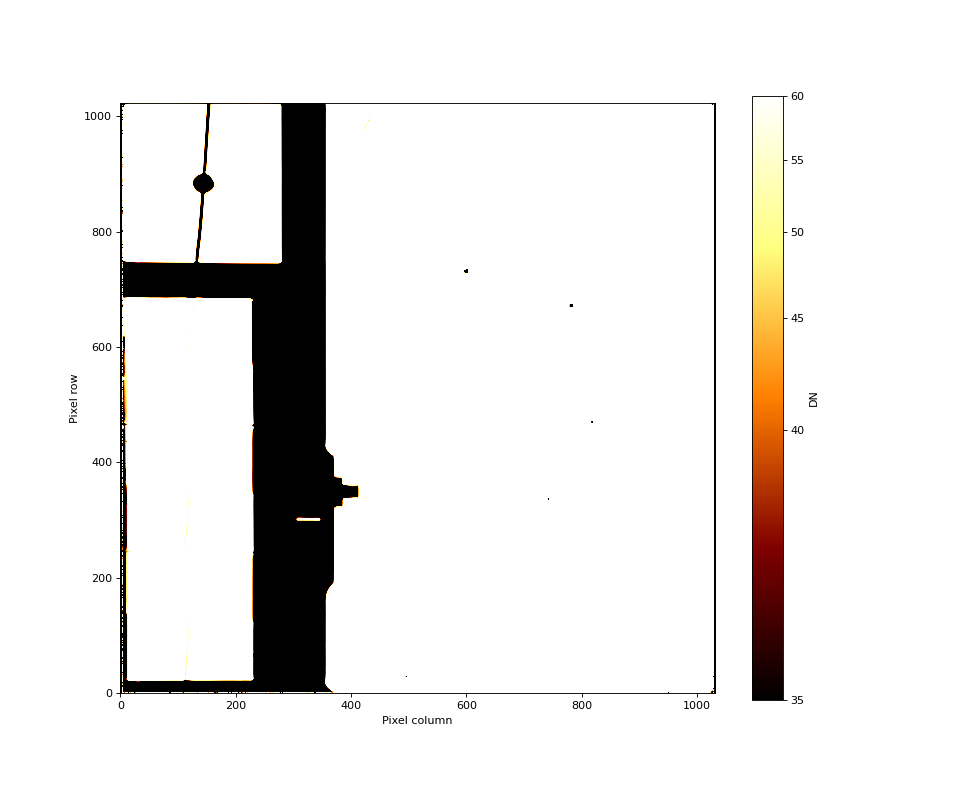

In [14]:
show_image(miri_rate.data, vmin=drange[0], vmax=drange[1], dmap=dmap)

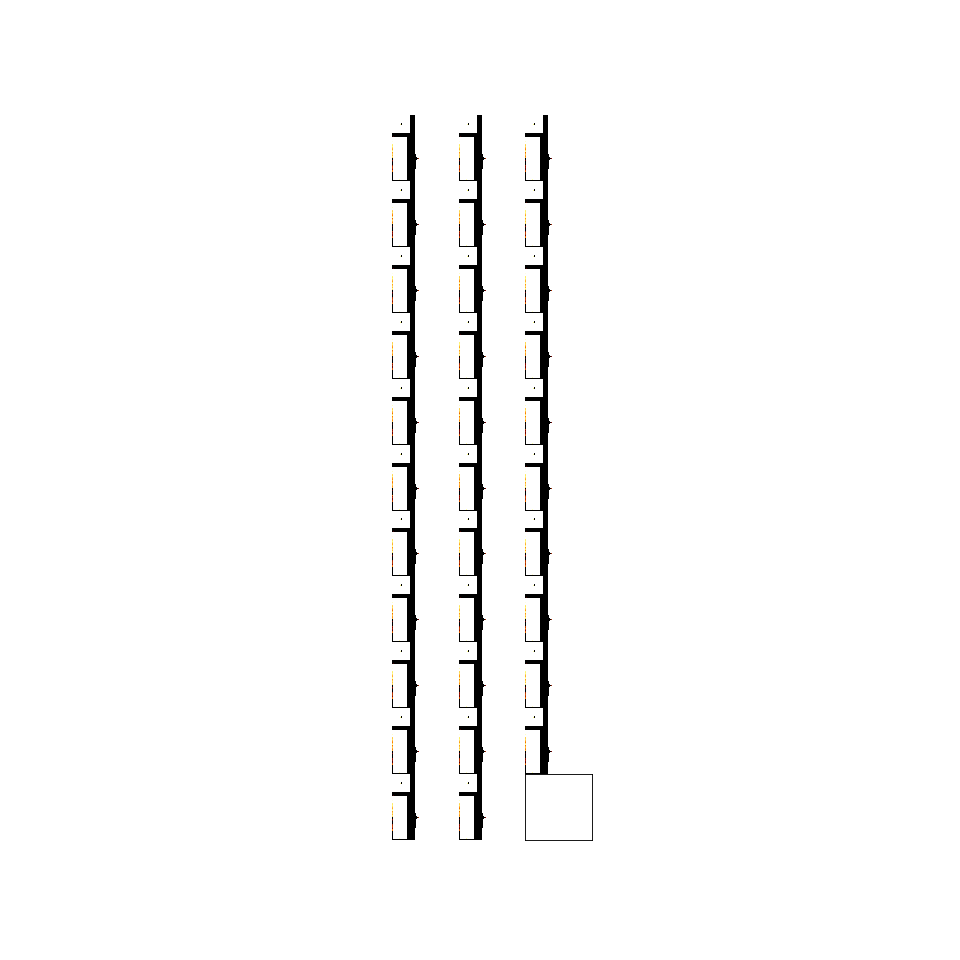

In [15]:
# display the images
fig = plt.figure(1, figsize=(12, 12))
ncols = len(miri_rate_files) // 3
grid = ImageGrid(fig, 111, nrows_ncols=(ncols+1, 3), axes_pad=0)

for i, cfile in enumerate(miri_rate_files):
    with datamodels.open(cfile) as miri_rate:
        cimage = miri_rate.data
        norm_data = simple_norm(cimage, "sqrt", min_cut=drange[0], max_cut=drange[1])
        grid[i].imshow(cimage, norm=norm_data, origin="lower", cmap=plt.get_cmap(dmap))
        grid[i].axis('off')
        grid[i].set_xticks([])
        grid[i].set_yticks([])

## CALWEBB_IMAGE2

In [16]:
miri_rate_files = glob.glob(f"./{filter}/stage1/*ge_fixed_rate.fits")
output_dir = f'./{filter}/stage2'
print(miri_rate_files)

['./F1500W/stage1/jw02732002001_02105_00008_mirimage_fixed_rate.fits', './F1500W/stage1/jw02732002001_02105_00003_mirimage_fixed_rate.fits', './F1500W/stage1/jw02732006001_02105_00006_mirimage_fixed_rate.fits', './F1500W/stage1/jw02732006001_02105_00008_mirimage_fixed_rate.fits', './F1500W/stage1/jw02732006002_02105_00001_mirimage_fixed_rate.fits', './F1500W/stage1/jw02732002001_02105_00004_mirimage_fixed_rate.fits', './F1500W/stage1/jw02732002002_02105_00002_mirimage_fixed_rate.fits', './F1500W/stage1/jw02732006001_02105_00007_mirimage_fixed_rate.fits', './F1500W/stage1/jw02732002002_02105_00003_mirimage_fixed_rate.fits', './F1500W/stage1/jw02732006001_02105_00004_mirimage_fixed_rate.fits', './F1500W/stage1/jw02732002002_02105_00006_mirimage_fixed_rate.fits', './F1500W/stage1/jw02732006002_02105_00005_mirimage_fixed_rate.fits', './F1500W/stage1/jw02732006001_02105_00003_mirimage_fixed_rate.fits', './F1500W/stage1/jw02732006002_02105_00008_mirimage_fixed_rate.fits', './F1500W/stage1/jw

In [17]:
if run_image2:
    miri_image2(miri_rate_files, output_dir, flatfile=flatfile)

2022-08-04 12:18:58,400 - stpipe.Image2Pipeline - INFO - Image2Pipeline instance created.
2022-08-04 12:18:58,402 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'save_combined_background': False, 'sigma': 3.0, 'maxiters': None, 'wfss_mmag_extract': None, 'override_wfssbkg': None, 'override_wavelengthrange': None, 'class': ''}


2022-08-04 12:18:58,402 - stpipe.Image2Pipeline.bkg_subtract - INFO - BackgroundStep instance created.
2022-08-04 12:18:58,403 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'sip_approx': True, 's

2022-08-04 12:19:00,417 - CRDS - INFO -  Fetching  /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_flat_0781.fits   21.2 M bytes  (1 / 1 files) (0 / 21.2 M bytes)
2022-08-04 12:19:01,335 - stpipe.Image2Pipeline - INFO - Prefetch for AREA reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits'.
2022-08-04 12:19:01,337 - stpipe.Image2Pipeline - INFO - Prefetch for CAMERA reference file is 'N/A'.
2022-08-04 12:19:01,338 - stpipe.Image2Pipeline - INFO - Prefetch for COLLIMATOR reference file is 'N/A'.
2022-08-04 12:19:01,338 - stpipe.Image2Pipeline - INFO - Prefetch for DFLAT reference file is 'N/A'.
2022-08-04 12:19:01,338 - stpipe.Image2Pipeline - INFO - Prefetch for DISPERSER reference file is 'N/A'.
2022-08-04 12:19:01,338 - stpipe.Image2Pipeline - INFO - Prefetch for DISTORTION reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf'.
2022-08-04 12:19:01,340 - stpipe.Image2Pipeline - INFO - Prefetch for

2022-08-04 12:19:01,369 - stpipe.Image2Pipeline - INFO - Prefetch for IFUPOST reference file is 'N/A'.
2022-08-04 12:19:01,369 - stpipe.Image2Pipeline - INFO - Prefetch for IFUSLICER reference file is 'N/A'.
2022-08-04 12:19:01,369 - stpipe.Image2Pipeline - INFO - Prefetch for MSA reference file is 'N/A'.
2022-08-04 12:19:01,370 - stpipe.Image2Pipeline - INFO - Prefetch for OTE reference file is 'N/A'.
2022-08-04 12:19:01,370 - stpipe.Image2Pipeline - INFO - Prefetch for PHOTOM reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_photom_0074.fits'.
2022-08-04 12:19:01,370 - stpipe.Image2Pipeline - INFO - Prefetch for REGIONS reference file is 'N/A'.
2022-08-04 12:19:01,371 - stpipe.Image2Pipeline - INFO - Prefetch for SFLAT reference file is 'N/A'.
2022-08-04 12:19:01,371 - stpipe.Image2Pipeline - INFO - Prefetch for SPECWCS reference file is 'N/A'.
2022-08-04 12:19:01,371 - stpipe.Image2Pipeline - INFO - Prefetch for WAVELENGTHRANGE reference file is 'N/A'.
2022-

2022-08-04 12:19:01,403 - stpipe.Image2Pipeline - INFO - Prefetch for DFLAT reference file is 'N/A'.
2022-08-04 12:19:01,404 - stpipe.Image2Pipeline - INFO - Prefetch for DISPERSER reference file is 'N/A'.
2022-08-04 12:19:01,404 - stpipe.Image2Pipeline - INFO - Prefetch for DISTORTION reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf'.
2022-08-04 12:19:01,405 - stpipe.Image2Pipeline - INFO - Prefetch for DRIZPARS reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits'.
2022-08-04 12:19:01,406 - stpipe.Image2Pipeline - INFO - Prefetch for FFLAT reference file is 'N/A'.
2022-08-04 12:19:01,406 - stpipe.Image2Pipeline - INFO - Prefetch for FILTEROFFSET reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_filteroffset_0006.asdf'.
2022-08-04 12:19:01,407 - stpipe.Image2Pipeline - INFO - Prefetch for FLAT reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_flat_0

2022-08-04 12:19:01,433 - stpipe.Image2Pipeline - INFO - Prefetch for REGIONS reference file is 'N/A'.
2022-08-04 12:19:01,434 - stpipe.Image2Pipeline - INFO - Prefetch for SFLAT reference file is 'N/A'.
2022-08-04 12:19:01,434 - stpipe.Image2Pipeline - INFO - Prefetch for SPECWCS reference file is 'N/A'.
2022-08-04 12:19:01,434 - stpipe.Image2Pipeline - INFO - Prefetch for WAVELENGTHRANGE reference file is 'N/A'.
2022-08-04 12:19:01,434 - stpipe.Image2Pipeline - INFO - Prefetch for WFSSBKG reference file is 'N/A'.
2022-08-04 12:19:01,435 - stpipe.Image2Pipeline - INFO - Prefetching reference files for dataset: 'jw02732002002_02105_00003_mirimage_fixed_rate.fits' reftypes = ['area', 'camera', 'collimator', 'dflat', 'disperser', 'distortion', 'drizpars', 'fflat', 'filteroffset', 'flat', 'fore', 'fpa', 'ifufore', 'ifupost', 'ifuslicer', 'msa', 'ote', 'photom', 'regions', 'sflat', 'specwcs', 'wavelengthrange', 'wfssbkg']
2022-08-04 12:19:01,438 - stpipe.Image2Pipeline - INFO - Prefetch fo

2022-08-04 12:19:01,467 - stpipe.Image2Pipeline - INFO - Prefetch for FFLAT reference file is 'N/A'.
2022-08-04 12:19:01,467 - stpipe.Image2Pipeline - INFO - Prefetch for FILTEROFFSET reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_filteroffset_0006.asdf'.
2022-08-04 12:19:01,468 - stpipe.Image2Pipeline - INFO - Prefetch for FLAT reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_flat_0781.fits'.
2022-08-04 12:19:01,469 - stpipe.Image2Pipeline - INFO - Prefetch for FORE reference file is 'N/A'.
2022-08-04 12:19:01,469 - stpipe.Image2Pipeline - INFO - Prefetch for FPA reference file is 'N/A'.
2022-08-04 12:19:01,469 - stpipe.Image2Pipeline - INFO - Prefetch for IFUFORE reference file is 'N/A'.
2022-08-04 12:19:01,470 - stpipe.Image2Pipeline - INFO - Prefetch for IFUPOST reference file is 'N/A'.
2022-08-04 12:19:01,470 - stpipe.Image2Pipeline - INFO - Prefetch for IFUSLICER reference file is 'N/A'.
2022-08-04 12:19:01,470 - stpipe.Image2

2022-08-04 12:19:01,502 - stpipe.Image2Pipeline - INFO - Prefetching reference files for dataset: 'jw02732006002_02105_00008_mirimage_fixed_rate.fits' reftypes = ['area', 'camera', 'collimator', 'dflat', 'disperser', 'distortion', 'drizpars', 'fflat', 'filteroffset', 'flat', 'fore', 'fpa', 'ifufore', 'ifupost', 'ifuslicer', 'msa', 'ote', 'photom', 'regions', 'sflat', 'specwcs', 'wavelengthrange', 'wfssbkg']
2022-08-04 12:19:01,505 - stpipe.Image2Pipeline - INFO - Prefetch for AREA reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits'.
2022-08-04 12:19:01,506 - stpipe.Image2Pipeline - INFO - Prefetch for CAMERA reference file is 'N/A'.
2022-08-04 12:19:01,506 - stpipe.Image2Pipeline - INFO - Prefetch for COLLIMATOR reference file is 'N/A'.
2022-08-04 12:19:01,506 - stpipe.Image2Pipeline - INFO - Prefetch for DFLAT reference file is 'N/A'.
2022-08-04 12:19:01,507 - stpipe.Image2Pipeline - INFO - Prefetch for DISPERSER reference file is 'N/A'.
2022-08-

2022-08-04 12:19:01,534 - stpipe.Image2Pipeline - INFO - Prefetch for FPA reference file is 'N/A'.
2022-08-04 12:19:01,534 - stpipe.Image2Pipeline - INFO - Prefetch for IFUFORE reference file is 'N/A'.
2022-08-04 12:19:01,534 - stpipe.Image2Pipeline - INFO - Prefetch for IFUPOST reference file is 'N/A'.
2022-08-04 12:19:01,534 - stpipe.Image2Pipeline - INFO - Prefetch for IFUSLICER reference file is 'N/A'.
2022-08-04 12:19:01,534 - stpipe.Image2Pipeline - INFO - Prefetch for MSA reference file is 'N/A'.
2022-08-04 12:19:01,535 - stpipe.Image2Pipeline - INFO - Prefetch for OTE reference file is 'N/A'.
2022-08-04 12:19:01,535 - stpipe.Image2Pipeline - INFO - Prefetch for PHOTOM reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_photom_0074.fits'.
2022-08-04 12:19:01,535 - stpipe.Image2Pipeline - INFO - Prefetch for REGIONS reference file is 'N/A'.
2022-08-04 12:19:01,536 - stpipe.Image2Pipeline - INFO - Prefetch for SFLAT reference file is 'N/A'.
2022-08-04 12:19:

2022-08-04 12:19:01,565 - stpipe.Image2Pipeline - INFO - Prefetch for CAMERA reference file is 'N/A'.
2022-08-04 12:19:01,565 - stpipe.Image2Pipeline - INFO - Prefetch for COLLIMATOR reference file is 'N/A'.
2022-08-04 12:19:01,566 - stpipe.Image2Pipeline - INFO - Prefetch for DFLAT reference file is 'N/A'.
2022-08-04 12:19:01,566 - stpipe.Image2Pipeline - INFO - Prefetch for DISPERSER reference file is 'N/A'.
2022-08-04 12:19:01,566 - stpipe.Image2Pipeline - INFO - Prefetch for DISTORTION reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf'.
2022-08-04 12:19:01,567 - stpipe.Image2Pipeline - INFO - Prefetch for DRIZPARS reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits'.
2022-08-04 12:19:01,568 - stpipe.Image2Pipeline - INFO - Prefetch for FFLAT reference file is 'N/A'.
2022-08-04 12:19:01,568 - stpipe.Image2Pipeline - INFO - Prefetch for FILTEROFFSET reference file is '/home/kgordon/crds_cache/refe

2022-08-04 12:19:01,593 - stpipe.Image2Pipeline - INFO - Prefetch for OTE reference file is 'N/A'.
2022-08-04 12:19:01,594 - stpipe.Image2Pipeline - INFO - Prefetch for PHOTOM reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_photom_0074.fits'.
2022-08-04 12:19:01,595 - stpipe.Image2Pipeline - INFO - Prefetch for REGIONS reference file is 'N/A'.
2022-08-04 12:19:01,595 - stpipe.Image2Pipeline - INFO - Prefetch for SFLAT reference file is 'N/A'.
2022-08-04 12:19:01,595 - stpipe.Image2Pipeline - INFO - Prefetch for SPECWCS reference file is 'N/A'.
2022-08-04 12:19:01,595 - stpipe.Image2Pipeline - INFO - Prefetch for WAVELENGTHRANGE reference file is 'N/A'.
2022-08-04 12:19:01,595 - stpipe.Image2Pipeline - INFO - Prefetch for WFSSBKG reference file is 'N/A'.
2022-08-04 12:19:01,596 - stpipe.Image2Pipeline - INFO - Prefetching reference files for dataset: 'jw02732006002_02105_00006_mirimage_fixed_rate.fits' reftypes = ['area', 'camera', 'collimator', 'dflat', 'disp

2022-08-04 12:19:01,631 - stpipe.Image2Pipeline - INFO - Prefetch for DRIZPARS reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits'.
2022-08-04 12:19:01,638 - stpipe.Image2Pipeline - INFO - Prefetch for FFLAT reference file is 'N/A'.
2022-08-04 12:19:01,638 - stpipe.Image2Pipeline - INFO - Prefetch for FILTEROFFSET reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_filteroffset_0006.asdf'.
2022-08-04 12:19:01,639 - stpipe.Image2Pipeline - INFO - Prefetch for FLAT reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_flat_0781.fits'.
2022-08-04 12:19:01,640 - stpipe.Image2Pipeline - INFO - Prefetch for FORE reference file is 'N/A'.
2022-08-04 12:19:01,640 - stpipe.Image2Pipeline - INFO - Prefetch for FPA reference file is 'N/A'.
2022-08-04 12:19:01,641 - stpipe.Image2Pipeline - INFO - Prefetch for IFUFORE reference file is 'N/A'.
2022-08-04 12:19:01,641 - stpipe.Image2Pipeline - INFO - Prefetch for IF

2022-08-04 12:19:01,667 - stpipe.Image2Pipeline - INFO - Prefetch for WAVELENGTHRANGE reference file is 'N/A'.
2022-08-04 12:19:01,667 - stpipe.Image2Pipeline - INFO - Prefetch for WFSSBKG reference file is 'N/A'.
2022-08-04 12:19:01,668 - stpipe.Image2Pipeline - INFO - Prefetching reference files for dataset: 'jw02732002002_02105_00001_mirimage_fixed_rate.fits' reftypes = ['area', 'camera', 'collimator', 'dflat', 'disperser', 'distortion', 'drizpars', 'fflat', 'filteroffset', 'flat', 'fore', 'fpa', 'ifufore', 'ifupost', 'ifuslicer', 'msa', 'ote', 'photom', 'regions', 'sflat', 'specwcs', 'wavelengthrange', 'wfssbkg']
2022-08-04 12:19:01,671 - stpipe.Image2Pipeline - INFO - Prefetch for AREA reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits'.
2022-08-04 12:19:01,672 - stpipe.Image2Pipeline - INFO - Prefetch for CAMERA reference file is 'N/A'.
2022-08-04 12:19:01,672 - stpipe.Image2Pipeline - INFO - Prefetch for COLLIMATOR reference file is 'N/A'.


2022-08-04 12:19:01,700 - stpipe.Image2Pipeline - INFO - Prefetch for FLAT reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_flat_0781.fits'.
2022-08-04 12:19:01,700 - stpipe.Image2Pipeline - INFO - Prefetch for FORE reference file is 'N/A'.
2022-08-04 12:19:01,700 - stpipe.Image2Pipeline - INFO - Prefetch for FPA reference file is 'N/A'.
2022-08-04 12:19:01,701 - stpipe.Image2Pipeline - INFO - Prefetch for IFUFORE reference file is 'N/A'.
2022-08-04 12:19:01,701 - stpipe.Image2Pipeline - INFO - Prefetch for IFUPOST reference file is 'N/A'.
2022-08-04 12:19:01,701 - stpipe.Image2Pipeline - INFO - Prefetch for IFUSLICER reference file is 'N/A'.
2022-08-04 12:19:01,701 - stpipe.Image2Pipeline - INFO - Prefetch for MSA reference file is 'N/A'.
2022-08-04 12:19:01,701 - stpipe.Image2Pipeline - INFO - Prefetch for OTE reference file is 'N/A'.
2022-08-04 12:19:01,702 - stpipe.Image2Pipeline - INFO - Prefetch for PHOTOM reference file is '/home/kgordon/crds_cache/refe

2022-08-04 12:19:01,733 - stpipe.Image2Pipeline - INFO - Prefetch for AREA reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits'.
2022-08-04 12:19:01,733 - stpipe.Image2Pipeline - INFO - Prefetch for CAMERA reference file is 'N/A'.
2022-08-04 12:19:01,734 - stpipe.Image2Pipeline - INFO - Prefetch for COLLIMATOR reference file is 'N/A'.
2022-08-04 12:19:01,734 - stpipe.Image2Pipeline - INFO - Prefetch for DFLAT reference file is 'N/A'.
2022-08-04 12:19:01,734 - stpipe.Image2Pipeline - INFO - Prefetch for DISPERSER reference file is 'N/A'.
2022-08-04 12:19:01,734 - stpipe.Image2Pipeline - INFO - Prefetch for DISTORTION reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf'.
2022-08-04 12:19:01,735 - stpipe.Image2Pipeline - INFO - Prefetch for DRIZPARS reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits'.
2022-08-04 12:19:01,735 - stpipe.Image2Pipeline - INFO - Prefetch

2022-08-04 12:19:03,798 - stpipe.Image2Pipeline.resample - INFO - Step resample parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'i2d', 'search_output_file': True, 'input_dir': '', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'weight_type': 'ivm', 'output_shape': None, 'crpix': None, 'crval': None, 'rotation': None, 'pixel_scale_ratio': 1.0, 'pixel_scale': None, 'single': False, 'blendheaders': True, 'allowed_memory': None}
2022-08-04 12:19:03,822 - stpipe.Image2Pipeline.resample - INFO - Drizpars reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits
2022-08-04 12:19:04,019 - stpipe.Image2Pipeline.resample - INFO - Resampling science data
2022-08-04 12:19:04,535 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-08-04 12:19:04,869 - stpipe

2022-08-04 12:19:09,966 - stpipe.Image2Pipeline.resample - INFO - Resampling science data
2022-08-04 12:19:10,477 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-08-04 12:19:10,823 - stpipe.Image2Pipeline.resample - INFO - Resampling var_rnoise
2022-08-04 12:19:11,357 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-08-04 12:19:11,725 - stpipe.Image2Pipeline.resample - INFO - Resampling var_poisson
2022-08-04 12:19:12,237 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-08-04 12:19:12,592 - stpipe.Image2Pipeline.resample - INFO - Resampling var_flat
2022-08-04 12:19:13,105 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-08-04 12:19:13,474 - stpipe.Image2Pipeline.resample - INFO - Update S_REGION to POLYGON ICRS  338.994471881 33.992604570 338.959661228 33.980247591 338.974710019 33.951101585 339.009510928 33.963454329
2022-08-04 12:19

2022-08-04 12:19:19,574 - stpipe.Image2Pipeline.resample - INFO - Update S_REGION to POLYGON ICRS  339.021508853 33.965047297 338.990553599 33.946976754 339.012548811 33.921049224 339.043499304 33.939114263
2022-08-04 12:19:20,177 - stpipe.Image2Pipeline.resample - INFO - Saved model in ./F1500W/stage2/jw02732006001_02105_00006_mirimage_fixed_i2d.fits
2022-08-04 12:19:20,178 - stpipe.Image2Pipeline.resample - INFO - Step resample done
2022-08-04 12:19:20,178 - stpipe.Image2Pipeline - INFO - Finished processing product ./F1500W/stage1/jw02732006001_02105_00006_mirimage_fixed
2022-08-04 12:19:20,179 - stpipe.Image2Pipeline - INFO - Processing product ./F1500W/stage1/jw02732006001_02105_00008_mirimage_fixed
2022-08-04 12:19:20,180 - stpipe.Image2Pipeline - INFO - Working on input ./F1500W/stage1/jw02732006001_02105_00008_mirimage_fixed_rate.fits ...
2022-08-04 12:19:20,489 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs running with args (<ImageModel(1024, 1032) from jw0273200

2022-08-04 12:19:26,215 - stpipe.Image2Pipeline - INFO - Working on input ./F1500W/stage1/jw02732006002_02105_00001_mirimage_fixed_rate.fits ...
2022-08-04 12:19:26,527 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs running with args (<ImageModel(1024, 1032) from jw02732006002_02105_00001_mirimage_fixed_rate.fits>,).
2022-08-04 12:19:26,528 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'assign_wcs', 'search_output_file': True, 'input_dir': '', 'sip_approx': True, 'sip_max_pix_error': 0.25, 'sip_degree': None, 'sip_max_inv_pix_error': 0.25, 'sip_inv_degree': None, 'sip_npoints': 32, 'slit_y_low': -0.55, 'slit_y_high': 0.55}
2022-08-04 12:19:26,760 - stpipe.Image2Pipeline.assign_wcs - INFO - Created a MIRI mir_image pipeline with references {'disto

2022-08-04 12:19:32,831 - stpipe.Image2Pipeline.assign_wcs - INFO - Created a MIRI mir_image pipeline with references {'distortion': '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf', 'filteroffset': '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_filteroffset_0006.asdf', 'specwcs': None, 'regions': None, 'wavelengthrange': None, 'camera': None, 'collimator': None, 'disperser': None, 'fore': None, 'fpa': None, 'msa': None, 'ote': None, 'ifupost': None, 'ifufore': None, 'ifuslicer': None}
2022-08-04 12:19:32,920 - stpipe.Image2Pipeline.assign_wcs - INFO - Update S_REGION to POLYGON ICRS  338.992924790 33.993657978 338.958296140 33.981241774 338.973288540 33.952388557 339.008102518 33.964554778
2022-08-04 12:19:32,920 - stpipe.Image2Pipeline.assign_wcs - INFO - assign_wcs updated S_REGION to POLYGON ICRS  338.992924790 33.993657978 338.958296140 33.981241774 338.973288540 33.952388557 339.008102518 33.964554778
2022-08-04 12:19:32,921 - stpipe.Image2

2022-08-04 12:19:39,030 - stpipe.Image2Pipeline.assign_wcs - INFO - assign_wcs updated S_REGION to POLYGON ICRS  339.019746693 34.000941405 338.985107125 33.988540447 339.000082343 33.959680634 339.034907083 33.971831527
2022-08-04 12:19:39,030 - stpipe.Image2Pipeline.assign_wcs - INFO - COMPLETED assign_wcs
2022-08-04 12:19:39,103 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs done
2022-08-04 12:19:39,369 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field running with args (<ImageModel(1024, 1032) from jw02732002002_02105_00002_mirimage_fixed_rate.fits>,).
2022-08-04 12:19:39,370 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'flat_field', 'search_output_file': True, 'input_dir': '', 'save_interpolated_flat': False, 'user_supplied_flat':

2022-08-04 12:19:45,620 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_PARTIAL_DATA does not correspond to an existing DQ mnemonic, so will be ignored
2022-08-04 12:19:45,620 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_LOW_QUAL does not correspond to an existing DQ mnemonic, so will be ignored
2022-08-04 12:19:45,621 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_UNRELIABLE_ERROR does not correspond to an existing DQ mnemonic, so will be ignored
2022-08-04 12:19:45,627 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword DIFF_PATTERN does not correspond to an existing DQ mnemonic, so will be ignored
2022-08-04 12:19:45,759 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field done
2022-08-04 12:19:46,028 - stpipe.Image2Pipeline.photom - INFO - Step photom running with args (<ImageModel(1024, 1032) from jw02732006001_02105_00007_mirimage_fixed_rate.fits>,).
2022-08-04 12:19:46,029 - stpipe.Image2Pipeline.photom - INFO - Step photom paramete

2022-08-04 12:19:52,173 - stpipe.Image2Pipeline.photom - INFO - Step photom running with args (<ImageModel(1024, 1032) from jw02732002002_02105_00003_mirimage_fixed_rate.fits>,).
2022-08-04 12:19:52,174 - stpipe.Image2Pipeline.photom - INFO - Step photom parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'photom', 'search_output_file': True, 'input_dir': '', 'inverse': False, 'source_type': None}
2022-08-04 12:19:52,197 - stpipe.Image2Pipeline.photom - INFO - Using photom reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_photom_0074.fits
2022-08-04 12:19:52,198 - stpipe.Image2Pipeline.photom - INFO - Using area reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits
2022-08-04 12:19:52,278 - stpipe.Image2Pipeline.photom - INFO - Using instrument: MIRI
2022-08-04 12:19:52

2022-08-04 12:19:58,362 - stpipe.Image2Pipeline.photom - INFO - Using area reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits
2022-08-04 12:19:58,444 - stpipe.Image2Pipeline.photom - INFO - Using instrument: MIRI
2022-08-04 12:19:58,444 - stpipe.Image2Pipeline.photom - INFO -  detector: MIRIMAGE
2022-08-04 12:19:58,445 - stpipe.Image2Pipeline.photom - INFO -  exp_type: MIR_IMAGE
2022-08-04 12:19:58,445 - stpipe.Image2Pipeline.photom - INFO -  filter: F1500W
2022-08-04 12:19:58,487 - stpipe.Image2Pipeline.photom - INFO - Pixel area map copied to output.
2022-08-04 12:19:58,490 - stpipe.Image2Pipeline.photom - INFO -  subarray: FULL
2022-08-04 12:19:58,490 - stpipe.Image2Pipeline.photom - WARNING - Expected to find one matching row in table, found 0.
2022-08-04 12:19:58,491 - stpipe.Image2Pipeline.photom - INFO - PHOTMJSR value: 0.366483
2022-08-04 12:19:58,508 - stpipe.Image2Pipeline.photom - INFO - Step photom done
2022-08-04 12:19:58,773 - stpipe.Im

2022-08-04 12:20:04,630 - stpipe.Image2Pipeline.photom - WARNING - Expected to find one matching row in table, found 0.
2022-08-04 12:20:04,631 - stpipe.Image2Pipeline.photom - INFO - PHOTMJSR value: 0.366483
2022-08-04 12:20:04,649 - stpipe.Image2Pipeline.photom - INFO - Step photom done
2022-08-04 12:20:04,914 - stpipe.Image2Pipeline.resample - INFO - Step resample running with args (<ImageModel(1024, 1032) from jw02732002002_02105_00006_mirimage_fixed_rate.fits>,).
2022-08-04 12:20:04,916 - stpipe.Image2Pipeline.resample - INFO - Step resample parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'i2d', 'search_output_file': True, 'input_dir': '', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'weight_type': 'ivm', 'output_shape': None, 'crpix': None, 'crval': None, 'rotation': None, 'pixel_scale_ratio': 1.0, 'pixe

2022-08-04 12:20:10,912 - stpipe.Image2Pipeline.resample - INFO - Drizpars reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits
2022-08-04 12:20:11,061 - stpipe.Image2Pipeline.resample - INFO - Resampling science data
2022-08-04 12:20:11,549 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-08-04 12:20:11,887 - stpipe.Image2Pipeline.resample - INFO - Resampling var_rnoise
2022-08-04 12:20:12,378 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-08-04 12:20:12,716 - stpipe.Image2Pipeline.resample - INFO - Resampling var_poisson
2022-08-04 12:20:13,205 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-08-04 12:20:13,546 - stpipe.Image2Pipeline.resample - INFO - Resampling var_flat
2022-08-04 12:20:14,036 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-08-04 12:20:14,393 - stpipe.Image2Pipeline.resample 

2022-08-04 12:20:19,494 - stpipe.Image2Pipeline.resample - INFO - Resampling var_flat
2022-08-04 12:20:19,981 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-08-04 12:20:20,347 - stpipe.Image2Pipeline.resample - INFO - Update S_REGION to POLYGON ICRS  339.022760234 33.969534251 338.991803135 33.951463958 339.013799202 33.925536251 339.044751539 33.943601039
2022-08-04 12:20:20,923 - stpipe.Image2Pipeline.resample - INFO - Saved model in ./F1500W/stage2/jw02732006001_02105_00003_mirimage_fixed_i2d.fits
2022-08-04 12:20:20,924 - stpipe.Image2Pipeline.resample - INFO - Step resample done
2022-08-04 12:20:20,924 - stpipe.Image2Pipeline - INFO - Finished processing product ./F1500W/stage1/jw02732006001_02105_00003_mirimage_fixed
2022-08-04 12:20:20,925 - stpipe.Image2Pipeline - INFO - Processing product ./F1500W/stage1/jw02732006002_02105_00008_mirimage_fixed
2022-08-04 12:20:20,926 - stpipe.Image2Pipeline - INFO - Working on input ./F1500W/stage1/jw02

2022-08-04 12:20:26,929 - stpipe.Image2Pipeline - INFO - Processing product ./F1500W/stage1/jw02732006002_02105_00002_mirimage_fixed
2022-08-04 12:20:26,929 - stpipe.Image2Pipeline - INFO - Working on input ./F1500W/stage1/jw02732006002_02105_00002_mirimage_fixed_rate.fits ...
2022-08-04 12:20:27,307 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs running with args (<ImageModel(1024, 1032) from jw02732006002_02105_00002_mirimage_fixed_rate.fits>,).
2022-08-04 12:20:27,309 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'assign_wcs', 'search_output_file': True, 'input_dir': '', 'sip_approx': True, 'sip_max_pix_error': 0.25, 'sip_degree': None, 'sip_max_inv_pix_error': 0.25, 'sip_inv_degree': None, 'sip_npoints': 32, 'slit_y_low': -0.55, 'slit_y_high'

2022-08-04 12:20:33,679 - stpipe.Image2Pipeline.assign_wcs - INFO - Created a MIRI mir_image pipeline with references {'distortion': '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf', 'filteroffset': '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_filteroffset_0006.asdf', 'specwcs': None, 'regions': None, 'wavelengthrange': None, 'camera': None, 'collimator': None, 'disperser': None, 'fore': None, 'fpa': None, 'msa': None, 'ote': None, 'ifupost': None, 'ifufore': None, 'ifuslicer': None}
2022-08-04 12:20:33,767 - stpipe.Image2Pipeline.assign_wcs - INFO - Update S_REGION to POLYGON ICRS  339.019821482 33.966351783 338.989059270 33.948254280 339.010926839 33.922603727 339.041936424 33.940488834
2022-08-04 12:20:33,768 - stpipe.Image2Pipeline.assign_wcs - INFO - assign_wcs updated S_REGION to POLYGON ICRS  339.019821482 33.966351783 338.989059270 33.948254280 339.010926839 33.922603727 339.041936424 33.940488834
2022-08-04 12:20:33,768 - stpipe.Image2

2022-08-04 12:20:39,776 - stpipe.Image2Pipeline.assign_wcs - INFO - assign_wcs updated S_REGION to POLYGON ICRS  339.011355618 33.982954090 338.980597185 33.964845157 339.002482869 33.939202736 339.033488842 33.957099362
2022-08-04 12:20:39,776 - stpipe.Image2Pipeline.assign_wcs - INFO - COMPLETED assign_wcs
2022-08-04 12:20:39,890 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs done
2022-08-04 12:20:40,176 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field running with args (<ImageModel(1024, 1032) from jw02732006002_02105_00003_mirimage_fixed_rate.fits>,).
2022-08-04 12:20:40,177 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'flat_field', 'search_output_file': True, 'input_dir': '', 'save_interpolated_flat': False, 'user_supplied_flat':

2022-08-04 12:20:46,433 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_PARTIAL_DATA does not correspond to an existing DQ mnemonic, so will be ignored
2022-08-04 12:20:46,434 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_LOW_QUAL does not correspond to an existing DQ mnemonic, so will be ignored
2022-08-04 12:20:46,434 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_UNRELIABLE_ERROR does not correspond to an existing DQ mnemonic, so will be ignored
2022-08-04 12:20:46,440 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword DIFF_PATTERN does not correspond to an existing DQ mnemonic, so will be ignored
2022-08-04 12:20:46,567 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field done
2022-08-04 12:20:46,844 - stpipe.Image2Pipeline.photom - INFO - Step photom running with args (<ImageModel(1024, 1032) from jw02732002002_02105_00004_mirimage_fixed_rate.fits>,).
2022-08-04 12:20:46,845 - stpipe.Image2Pipeline.photom - INFO - Step photom paramete

2022-08-04 12:20:52,995 - stpipe.Image2Pipeline.photom - INFO - Step photom running with args (<ImageModel(1024, 1032) from jw02732002002_02105_00008_mirimage_fixed_rate.fits>,).
2022-08-04 12:20:52,997 - stpipe.Image2Pipeline.photom - INFO - Step photom parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'photom', 'search_output_file': True, 'input_dir': '', 'inverse': False, 'source_type': None}
2022-08-04 12:20:53,019 - stpipe.Image2Pipeline.photom - INFO - Using photom reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_photom_0074.fits
2022-08-04 12:20:53,020 - stpipe.Image2Pipeline.photom - INFO - Using area reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits
2022-08-04 12:20:53,104 - stpipe.Image2Pipeline.photom - INFO - Using instrument: MIRI
2022-08-04 12:20:53

2022-08-04 12:20:59,166 - stpipe.Image2Pipeline.photom - INFO - Using area reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits
2022-08-04 12:20:59,248 - stpipe.Image2Pipeline.photom - INFO - Using instrument: MIRI
2022-08-04 12:20:59,249 - stpipe.Image2Pipeline.photom - INFO -  detector: MIRIMAGE
2022-08-04 12:20:59,249 - stpipe.Image2Pipeline.photom - INFO -  exp_type: MIR_IMAGE
2022-08-04 12:20:59,249 - stpipe.Image2Pipeline.photom - INFO -  filter: F1500W
2022-08-04 12:20:59,292 - stpipe.Image2Pipeline.photom - INFO - Pixel area map copied to output.
2022-08-04 12:20:59,294 - stpipe.Image2Pipeline.photom - INFO -  subarray: FULL
2022-08-04 12:20:59,295 - stpipe.Image2Pipeline.photom - WARNING - Expected to find one matching row in table, found 0.
2022-08-04 12:20:59,295 - stpipe.Image2Pipeline.photom - INFO - PHOTMJSR value: 0.366483
2022-08-04 12:20:59,313 - stpipe.Image2Pipeline.photom - INFO - Step photom done
2022-08-04 12:20:59,600 - stpipe.Im

2022-08-04 12:21:05,375 - stpipe.Image2Pipeline.photom - WARNING - Expected to find one matching row in table, found 0.
2022-08-04 12:21:05,375 - stpipe.Image2Pipeline.photom - INFO - PHOTMJSR value: 0.366483
2022-08-04 12:21:05,392 - stpipe.Image2Pipeline.photom - INFO - Step photom done
2022-08-04 12:21:05,676 - stpipe.Image2Pipeline.resample - INFO - Step resample running with args (<ImageModel(1024, 1032) from jw02732002001_02105_00001_mirimage_fixed_rate.fits>,).
2022-08-04 12:21:05,677 - stpipe.Image2Pipeline.resample - INFO - Step resample parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'i2d', 'search_output_file': True, 'input_dir': '', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'weight_type': 'ivm', 'output_shape': None, 'crpix': None, 'crval': None, 'rotation': None, 'pixel_scale_ratio': 1.0, 'pixe

2022-08-04 12:21:11,767 - stpipe.Image2Pipeline.resample - INFO - Drizpars reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits
2022-08-04 12:21:11,912 - stpipe.Image2Pipeline.resample - INFO - Resampling science data
2022-08-04 12:21:12,406 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-08-04 12:21:12,741 - stpipe.Image2Pipeline.resample - INFO - Resampling var_rnoise
2022-08-04 12:21:13,229 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-08-04 12:21:13,567 - stpipe.Image2Pipeline.resample - INFO - Resampling var_poisson
2022-08-04 12:21:14,058 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-08-04 12:21:14,397 - stpipe.Image2Pipeline.resample - INFO - Resampling var_flat
2022-08-04 12:21:14,879 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-08-04 12:21:15,235 - stpipe.Image2Pipeline.resample 

2022-08-04 12:21:20,526 - stpipe.Image2Pipeline.resample - INFO - Resampling var_flat
2022-08-04 12:21:21,014 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-08-04 12:21:21,374 - stpipe.Image2Pipeline.resample - INFO - Update S_REGION to POLYGON ICRS  339.021655244 33.997982249 338.986834437 33.985640671 339.001865435 33.956488012 339.036676484 33.968825358
2022-08-04 12:21:21,959 - stpipe.Image2Pipeline.resample - INFO - Saved model in ./F1500W/stage2/jw02732002002_02105_00007_mirimage_fixed_i2d.fits
2022-08-04 12:21:21,959 - stpipe.Image2Pipeline.resample - INFO - Step resample done
2022-08-04 12:21:21,960 - stpipe.Image2Pipeline - INFO - Finished processing product ./F1500W/stage1/jw02732002002_02105_00007_mirimage_fixed
2022-08-04 12:21:21,961 - stpipe.Image2Pipeline - INFO - Processing product ./F1500W/stage1/jw02732002002_02105_00005_mirimage_fixed
2022-08-04 12:21:21,961 - stpipe.Image2Pipeline - INFO - Working on input ./F1500W/stage1/jw02

2022-08-04 12:21:28,016 - stpipe.Image2Pipeline - INFO - Processing product ./F1500W/stage1/jw02732002001_02105_00002_mirimage_fixed
2022-08-04 12:21:28,016 - stpipe.Image2Pipeline - INFO - Working on input ./F1500W/stage1/jw02732002001_02105_00002_mirimage_fixed_rate.fits ...
2022-08-04 12:21:28,359 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs running with args (<ImageModel(1024, 1032) from jw02732002001_02105_00002_mirimage_fixed_rate.fits>,).
2022-08-04 12:21:28,360 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'assign_wcs', 'search_output_file': True, 'input_dir': '', 'sip_approx': True, 'sip_max_pix_error': 0.25, 'sip_degree': None, 'sip_max_inv_pix_error': 0.25, 'sip_inv_degree': None, 'sip_npoints': 32, 'slit_y_low': -0.55, 'slit_y_high'

2022-08-04 12:21:34,759 - stpipe.Image2Pipeline.assign_wcs - INFO - Created a MIRI mir_image pipeline with references {'distortion': '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf', 'filteroffset': '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_filteroffset_0006.asdf', 'specwcs': None, 'regions': None, 'wavelengthrange': None, 'camera': None, 'collimator': None, 'disperser': None, 'fore': None, 'fpa': None, 'msa': None, 'ote': None, 'ifupost': None, 'ifufore': None, 'ifuslicer': None}
2022-08-04 12:21:34,851 - stpipe.Image2Pipeline.assign_wcs - INFO - Update S_REGION to POLYGON ICRS  339.020548040 33.967690623 338.989785201 33.949593289 339.011652911 33.923942616 339.042663125 33.941827554
2022-08-04 12:21:34,852 - stpipe.Image2Pipeline.assign_wcs - INFO - assign_wcs updated S_REGION to POLYGON ICRS  339.020548040 33.967690623 338.989785201 33.949593289 339.011652911 33.923942616 339.042663125 33.941827554
2022-08-04 12:21:34,852 - stpipe.Image2

2022-08-04 12:21:41,008 - stpipe.Image2Pipeline.assign_wcs - INFO - assign_wcs updated S_REGION to POLYGON ICRS  339.018700247 33.999756926 338.984061323 33.987355660 338.999036704 33.958495980 339.033860802 33.970647182
2022-08-04 12:21:41,008 - stpipe.Image2Pipeline.assign_wcs - INFO - COMPLETED assign_wcs
2022-08-04 12:21:41,079 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs done
2022-08-04 12:21:41,380 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field running with args (<ImageModel(1024, 1032) from jw02732002002_02105_00001_mirimage_fixed_rate.fits>,).
2022-08-04 12:21:41,381 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'flat_field', 'search_output_file': True, 'input_dir': '', 'save_interpolated_flat': False, 'user_supplied_flat':

2022-08-04 12:21:47,640 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_PARTIAL_DATA does not correspond to an existing DQ mnemonic, so will be ignored
2022-08-04 12:21:47,641 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_LOW_QUAL does not correspond to an existing DQ mnemonic, so will be ignored
2022-08-04 12:21:47,641 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_UNRELIABLE_ERROR does not correspond to an existing DQ mnemonic, so will be ignored
2022-08-04 12:21:47,647 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword DIFF_PATTERN does not correspond to an existing DQ mnemonic, so will be ignored
2022-08-04 12:21:47,770 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field done
2022-08-04 12:21:48,068 - stpipe.Image2Pipeline.photom - INFO - Step photom running with args (<ImageModel(1024, 1032) from jw02732006002_02105_00007_mirimage_fixed_rate.fits>,).
2022-08-04 12:21:48,069 - stpipe.Image2Pipeline.photom - INFO - Step photom paramete

2022-08-04 12:21:54,172 - stpipe.Image2Pipeline.photom - INFO - Step photom running with args (<ImageModel(1024, 1032) from jw02732002001_02105_00005_mirimage_fixed_rate.fits>,).
2022-08-04 12:21:54,174 - stpipe.Image2Pipeline.photom - INFO - Step photom parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'photom', 'search_output_file': True, 'input_dir': '', 'inverse': False, 'source_type': None}
2022-08-04 12:21:54,198 - stpipe.Image2Pipeline.photom - INFO - Using photom reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_photom_0074.fits
2022-08-04 12:21:54,198 - stpipe.Image2Pipeline.photom - INFO - Using area reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits
2022-08-04 12:21:54,282 - stpipe.Image2Pipeline.photom - INFO - Using instrument: MIRI
2022-08-04 12:21:54

2022-08-04 12:22:00,353 - stpipe.Image2Pipeline.photom - INFO - Using area reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits
2022-08-04 12:22:00,435 - stpipe.Image2Pipeline.photom - INFO - Using instrument: MIRI
2022-08-04 12:22:00,436 - stpipe.Image2Pipeline.photom - INFO -  detector: MIRIMAGE
2022-08-04 12:22:00,436 - stpipe.Image2Pipeline.photom - INFO -  exp_type: MIR_IMAGE
2022-08-04 12:22:00,437 - stpipe.Image2Pipeline.photom - INFO -  filter: F1500W
2022-08-04 12:22:00,478 - stpipe.Image2Pipeline.photom - INFO - Pixel area map copied to output.
2022-08-04 12:22:00,480 - stpipe.Image2Pipeline.photom - INFO -  subarray: FULL
2022-08-04 12:22:00,481 - stpipe.Image2Pipeline.photom - WARNING - Expected to find one matching row in table, found 0.
2022-08-04 12:22:00,482 - stpipe.Image2Pipeline.photom - INFO - PHOTMJSR value: 0.366483
2022-08-04 12:22:00,499 - stpipe.Image2Pipeline.photom - INFO - Step photom done
2022-08-04 12:22:00,800 - stpipe.Im

2022-08-04 12:22:06,843 - stpipe.Image2Pipeline.photom - WARNING - Expected to find one matching row in table, found 0.
2022-08-04 12:22:06,844 - stpipe.Image2Pipeline.photom - INFO - PHOTMJSR value: 0.366483
2022-08-04 12:22:06,860 - stpipe.Image2Pipeline.photom - INFO - Step photom done
2022-08-04 12:22:07,166 - stpipe.Image2Pipeline.resample - INFO - Step resample running with args (<ImageModel(1024, 1032) from jw02732002001_02105_00006_mirimage_fixed_rate.fits>,).
2022-08-04 12:22:07,167 - stpipe.Image2Pipeline.resample - INFO - Step resample parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'i2d', 'search_output_file': True, 'input_dir': '', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'weight_type': 'ivm', 'output_shape': None, 'crpix': None, 'crval': None, 'rotation': None, 'pixel_scale_ratio': 1.0, 'pixe

2022-08-04 12:22:13,478 - stpipe.Image2Pipeline.resample - INFO - Drizpars reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits
2022-08-04 12:22:13,630 - stpipe.Image2Pipeline.resample - INFO - Resampling science data
2022-08-04 12:22:14,130 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-08-04 12:22:14,470 - stpipe.Image2Pipeline.resample - INFO - Resampling var_rnoise
2022-08-04 12:22:14,959 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-08-04 12:22:15,298 - stpipe.Image2Pipeline.resample - INFO - Resampling var_poisson
2022-08-04 12:22:15,789 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-08-04 12:22:16,131 - stpipe.Image2Pipeline.resample - INFO - Resampling var_flat
2022-08-04 12:22:16,623 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-08-04 12:22:16,978 - stpipe.Image2Pipeline.resample 

2022-08-04 12:22:35,843 - stpipe.Image2Pipeline - INFO - Saved model in ./F1500W/stage2/jw02732006001_02105_00002_mirimage_fixed_cal.fits
2022-08-04 12:22:36,547 - stpipe.Image2Pipeline - INFO - Saved model in ./F1500W/stage2/jw02732002002_02105_00001_mirimage_fixed_cal.fits
2022-08-04 12:22:37,244 - stpipe.Image2Pipeline - INFO - Saved model in ./F1500W/stage2/jw02732006002_02105_00007_mirimage_fixed_cal.fits
2022-08-04 12:22:38,034 - stpipe.Image2Pipeline - INFO - Saved model in ./F1500W/stage2/jw02732002001_02105_00005_mirimage_fixed_cal.fits
2022-08-04 12:22:39,174 - stpipe.Image2Pipeline - INFO - Saved model in ./F1500W/stage2/jw02732006001_02105_00005_mirimage_fixed_cal.fits
2022-08-04 12:22:39,957 - stpipe.Image2Pipeline - INFO - Saved model in ./F1500W/stage2/jw02732002001_02105_00006_mirimage_fixed_cal.fits
2022-08-04 12:22:40,815 - stpipe.Image2Pipeline - INFO - Saved model in ./F1500W/stage2/jw02732006002_02105_00004_mirimage_fixed_cal.fits
2022-08-04 12:22:40,815 - stpipe.I

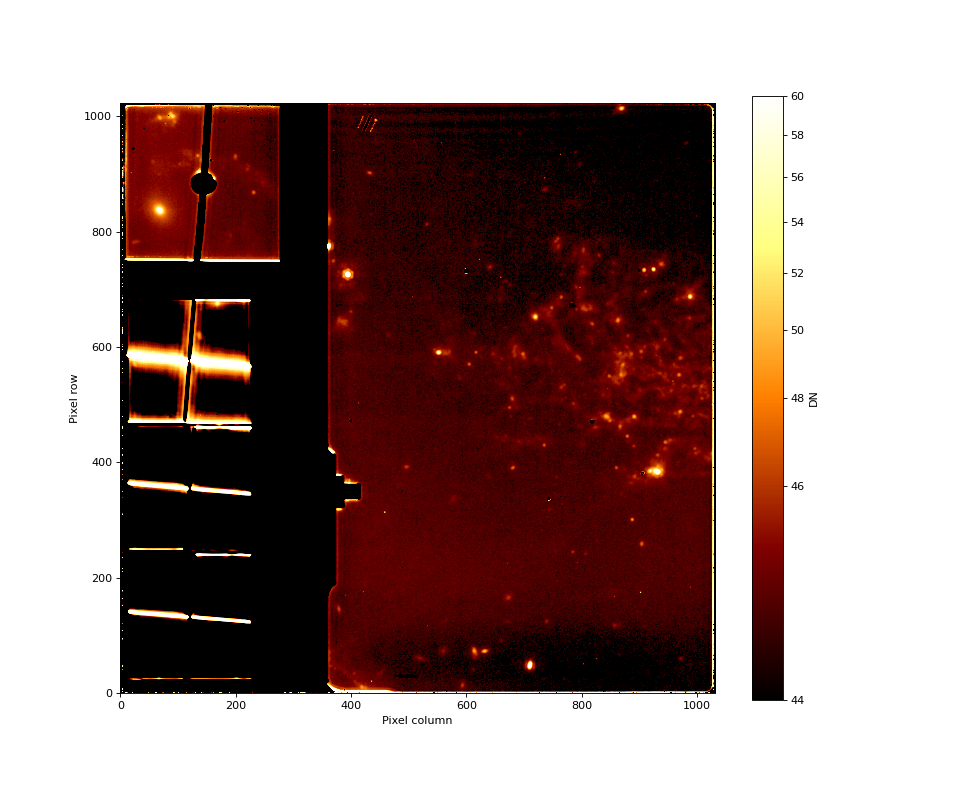

In [37]:
drange = drange_cal
# look at one of the images
miri_cal_files = glob.glob(f"./{filter}/stage2/*ge_fixed_cal.fits")
miri_cal = datamodels.open(miri_cal_files[0])
show_image(miri_cal.data, vmin=drange[0], vmax=drange[1], dmap=dmap)

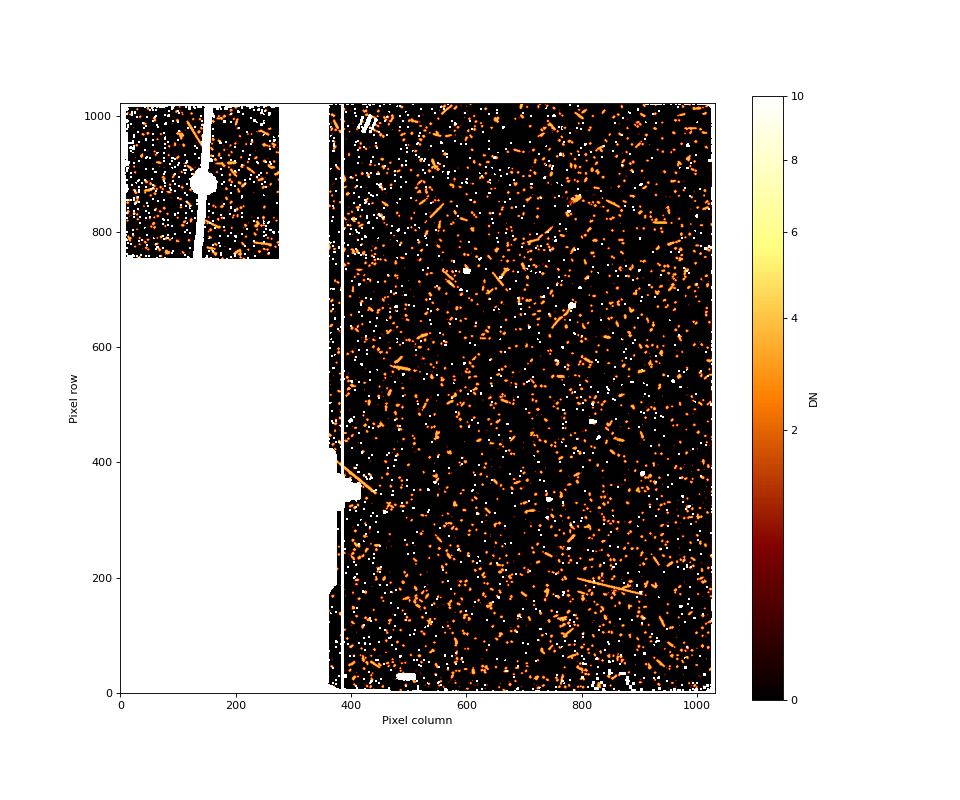

In [19]:
show_image(miri_cal.dq, 0, 10, dmap=dmap)

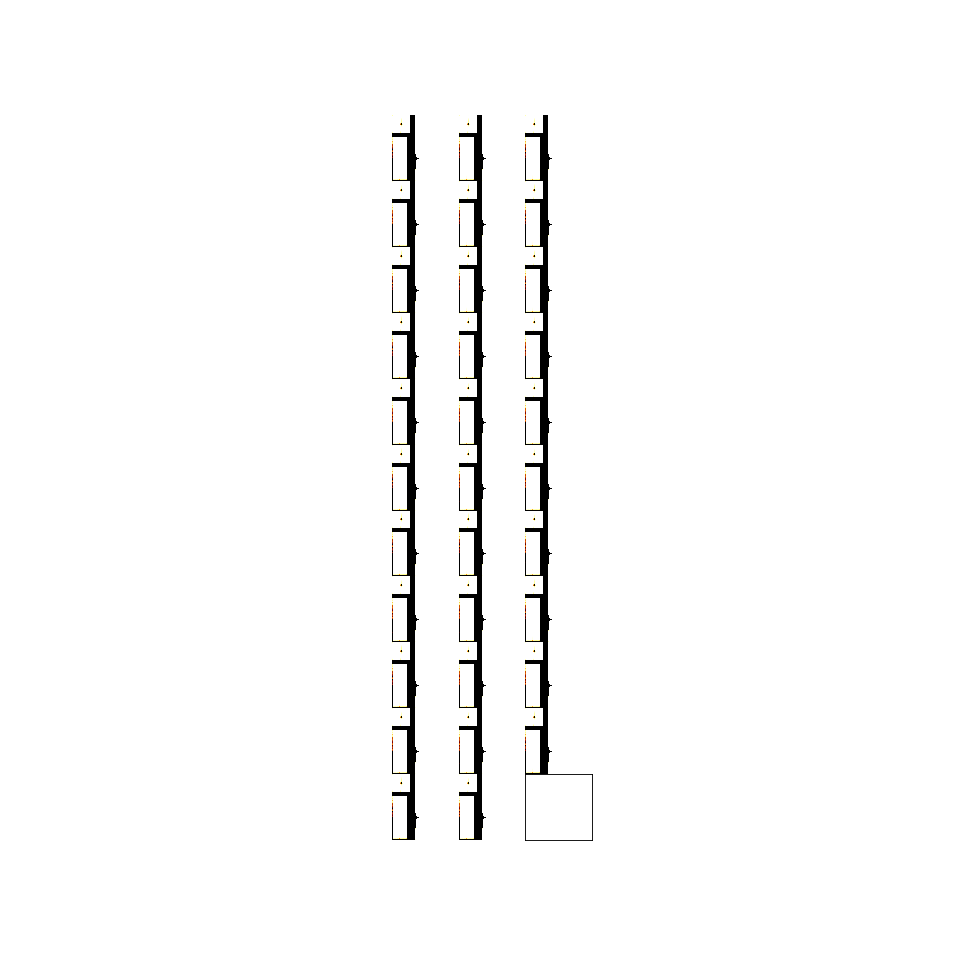

In [20]:
# display the images
fig = plt.figure(1, figsize=(12, 12))
ncols = len(miri_cal_files) // 3
grid = ImageGrid(fig, 111, nrows_ncols=(ncols+1, 3), axes_pad=0)

for i, cfile in enumerate(miri_cal_files):
    with datamodels.open(cfile) as miri_cal:
        cimage = miri_cal.data
        norm_data = simple_norm(cimage, "sqrt", min_cut=drange[0], max_cut=drange[1])
        grid[i].imshow(cimage, norm=norm_data, origin="lower", cmap=plt.get_cmap(dmap))
        grid[i].axis('off')
        grid[i].set_xticks([])
        grid[i].set_yticks([])

## CALWEBB_IMAGE3

In [21]:
# update the WCS for mosaic tile 1
miri_cal_files = glob.glob(f"./{filter}/stage2/{basename}2001*ge_fixed_cal.fits")
for cfile in miri_cal_files:
    shift_cal_wcs(cfile, tile1_shifts)

# update the WCS for mosaic tile 2
miri_cal_files = glob.glob(f"./{filter}/stage2/{basename}2002*ge_fixed_cal.fits")
for cfile in miri_cal_files:
    shift_cal_wcs(cfile, tile2_shifts)
    
# update the WCS for mosaic tile 3
miri_cal_files = glob.glob(f"./{filter}/stage2/{basename}6001*ge_fixed_cal.fits")
for cfile in miri_cal_files:
    shift_cal_wcs(cfile, tile3_shifts)
    
# update the WCS for mosaic tile 4
miri_cal_files = glob.glob(f"./{filter}/stage2/{basename}6002*ge_fixed_cal.fits")
for cfile in miri_cal_files:
    shift_cal_wcs(cfile, tile4_shifts)

In [22]:
miri_cal_files = glob.glob(f"./{filter}/stage2/j*ge_fixed_wcs_cal.fits")
output_dir = f"./{filter}/stage3/"
print(miri_cal_files)

if rotation is not None:
    miri_asn_name = f'miri_{filter}_stage3_fixedrot_asn'
else: 
    miri_asn_name = f'miri_{filter}_stage3_asn'
miri_asn = asn_from_list.asn_from_list(miri_cal_files, rule=DMS_Level3_Base, product_name=miri_asn_name)

miri_asn_file = f'{miri_asn_name}.json'
with open(miri_asn_file, 'w') as outfile:
    name, serialized = miri_asn.dump(format='json')
    outfile.write(serialized)
    
print(miri_asn_file)

['./F1500W/stage2/jw02732006002_02105_00005_mirimage_fixed_wcs_cal.fits', './F1500W/stage2/jw02732002002_02105_00008_mirimage_fixed_wcs_cal.fits', './F1500W/stage2/jw02732006001_02105_00001_mirimage_fixed_wcs_cal.fits', './F1500W/stage2/jw02732002002_02105_00006_mirimage_fixed_wcs_cal.fits', './F1500W/stage2/jw02732006001_02105_00007_mirimage_fixed_wcs_cal.fits', './F1500W/stage2/jw02732006001_02105_00005_mirimage_fixed_wcs_cal.fits', './F1500W/stage2/jw02732002002_02105_00001_mirimage_fixed_wcs_cal.fits', './F1500W/stage2/jw02732002001_02105_00008_mirimage_fixed_wcs_cal.fits', './F1500W/stage2/jw02732002001_02105_00007_mirimage_fixed_wcs_cal.fits', './F1500W/stage2/jw02732002002_02105_00003_mirimage_fixed_wcs_cal.fits', './F1500W/stage2/jw02732002002_02105_00002_mirimage_fixed_wcs_cal.fits', './F1500W/stage2/jw02732006001_02105_00008_mirimage_fixed_wcs_cal.fits', './F1500W/stage2/jw02732006002_02105_00008_mirimage_fixed_wcs_cal.fits', './F1500W/stage2/jw02732006001_02105_00002_mirimag

In [23]:
if run_image3:
    miri_image3(miri_asn_file, output_dir, fwhm=fwhm, matchbkg=matchbkg, 
                crval=crval, rotation=rotation, 
                tweakreg=tweakreg, align_to_gaia=align_to_gaia)

2022-08-04 12:23:37,834 - stpipe.Image3Pipeline - INFO - Image3Pipeline instance created.
2022-08-04 12:23:37,835 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': True, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'assign_mtwcs', 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-08-04 12:23:37,836 - stpipe.Image3Pipeline.assign_mtwcs - INFO - AssignMTWcsStep instance created.
2022-08-04 12:23:37,837 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': True, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'save_catalogs': False, 'catalog_format': 'ecsv', 'kernel_fwhm': 2.5, 'snr_threshold': 10.0, 'brightest': 200, 'peakmax': None, 'enforce_user_order': False, 'expand_re

2022-08-04 12:23:38,457 - stpipe.Image3Pipeline - INFO - Prefetch for DRIZPARS reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits'.
2022-08-04 12:23:38,458 - stpipe.Image3Pipeline - INFO - Starting calwebb_image3 ...
2022-08-04 12:23:45,668 - stpipe.Image3Pipeline.tweakreg - INFO - Step tweakreg running with args (<ModelContainer>,).
2022-08-04 12:23:45,669 - stpipe.Image3Pipeline.tweakreg - INFO - Step tweakreg parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': True, 'output_use_index': True, 'save_results': True, 'skip': True, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_catalogs': False, 'catalog_format': 'ecsv', 'kernel_fwhm': 4.4, 'snr_threshold': 5, 'brightest': 200, 'peakmax': None, 'enforce_user_order': False, 'expand_refcat': False, 'minobj': 5, 'searchrad': 5.0, 'use2dhist': True, 'separation': 1.0, 'tolerance': 0.7, 'xoffset': 

2022-08-04 12:26:04,526 - stpipe.Image3Pipeline.skymatch - INFO -  
2022-08-04 12:26:04,673 - stpipe.Image3Pipeline.skymatch - INFO - Step skymatch done
2022-08-04 12:26:05,192 - stpipe.Image3Pipeline.outlier_detection - INFO - Step outlier_detection running with args (<ModelContainer>,).
2022-08-04 12:26:05,194 - stpipe.Image3Pipeline.outlier_detection - INFO - Step outlier_detection parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'crf', 'search_output_file': False, 'input_dir': '', 'weight_type': 'ivm', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'nlow': 0, 'nhigh': 0, 'maskpt': 0.7, 'grow': 1, 'snr': '5.0 4.0', 'scale': '1.2 0.7', 'backg': 0.0, 'save_intermediate_results': False, 'resample_data': True, 'good_bits': '~DO_NOT_USE', 'scale_detection': False, 'allowed_memory': None}
2022-08-04 12:26:05,210 - s

2022-08-04 12:27:18,320 - stpipe.Image3Pipeline.outlier_detection - INFO - Blotting (1024, 1032) <-- (2132, 2488)
2022-08-04 12:27:19,249 - stpipe.Image3Pipeline.outlier_detection - INFO - Blotting (1024, 1032) <-- (2132, 2488)
2022-08-04 12:27:20,119 - stpipe.Image3Pipeline.outlier_detection - INFO - Blotting (1024, 1032) <-- (2132, 2488)
2022-08-04 12:27:20,153 - stpipe.Image3Pipeline.outlier_detection - INFO - Flagging outliers
2022-08-04 12:27:20,242 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 20403 (1.93%)
2022-08-04 12:27:20,325 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 6259 (0.59%)
2022-08-04 12:27:20,408 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 14322 (1.36%)
2022-08-04 12:27:20,492 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 8473 (0.80%)
2022-08-04 12:27:20,572 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixe

2022-08-04 12:27:52,146 - stpipe.Image3Pipeline.outlier_detection - INFO - Saved model in ./F1500W/stage3/jw02732002002_02105_00007_mirimage_fixed_wcs_a3001_crf.fits
2022-08-04 12:27:53,177 - stpipe.Image3Pipeline.outlier_detection - INFO - Saved model in ./F1500W/stage3/jw02732002002_02105_00004_mirimage_fixed_wcs_a3001_crf.fits
2022-08-04 12:27:54,249 - stpipe.Image3Pipeline.outlier_detection - INFO - Saved model in ./F1500W/stage3/jw02732006001_02105_00006_mirimage_fixed_wcs_a3001_crf.fits
2022-08-04 12:27:55,318 - stpipe.Image3Pipeline.outlier_detection - INFO - Saved model in ./F1500W/stage3/jw02732002001_02105_00005_mirimage_fixed_wcs_a3001_crf.fits
2022-08-04 12:27:56,372 - stpipe.Image3Pipeline.outlier_detection - INFO - Saved model in ./F1500W/stage3/jw02732002001_02105_00002_mirimage_fixed_wcs_a3001_crf.fits
2022-08-04 12:27:57,416 - stpipe.Image3Pipeline.outlier_detection - INFO - Saved model in ./F1500W/stage3/jw02732006001_02105_00004_mirimage_fixed_wcs_a3001_crf.fits
2022

2022-08-04 12:28:54,520 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (2150, 2508)
2022-08-04 12:28:55,539 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (2150, 2508)
2022-08-04 12:28:56,530 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (2150, 2508)
2022-08-04 12:28:57,547 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (2150, 2508)
2022-08-04 12:28:58,573 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (2150, 2508)
2022-08-04 12:28:59,575 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (2150, 2508)
2022-08-04 12:29:00,583 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (2150, 2508)
2022-08-04 12:29:01,617 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (2150, 2508)
2022-08-04 12:29:02,631 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (2150, 2508)
2022-08-04 12:29:03,618 - stpipe.Image3Pipelin

2022-08-04 12:30:12,080 - stpipe.Image3Pipeline.resample - INFO - Saved model in ./F1500W/stage3/miri_F1500W_stage3_asn_i2d.fits
2022-08-04 12:30:12,080 - stpipe.Image3Pipeline.resample - INFO - Step resample done
2022-08-04 12:30:12,472 - stpipe.Image3Pipeline.source_catalog - INFO - Step source_catalog running with args (<ImageModel(2150, 2508) from miri_F1500W_stage3_asn_i2d.fits>,).
2022-08-04 12:30:12,473 - stpipe.Image3Pipeline.source_catalog - INFO - Step source_catalog parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'cat', 'search_output_file': True, 'input_dir': '', 'bkg_boxsize': 1000, 'kernel_fwhm': 2.0, 'snr_threshold': 5, 'npixels': 25, 'deblend': False, 'aperture_ee1': 30, 'aperture_ee2': 50, 'aperture_ee3': 70, 'ci1_star_threshold': 2.0, 'ci2_star_threshold': 1.8}
2022-08-04 12:30:12,491 - stpipe.Image3Pip

In [24]:
# Look at the resulting mosaic image
miri_mosaic_file = output_dir + miri_asn_name + '_i2d.fits'
miri_catalog_file = output_dir + miri_asn_name + '_cat.ecsv'

In [25]:
# Open the mosaic image
miri_mosaic = datamodels.open(miri_mosaic_file)

In [26]:
# Read in the source catalog
miri_source_cat = ascii.read(miri_catalog_file)

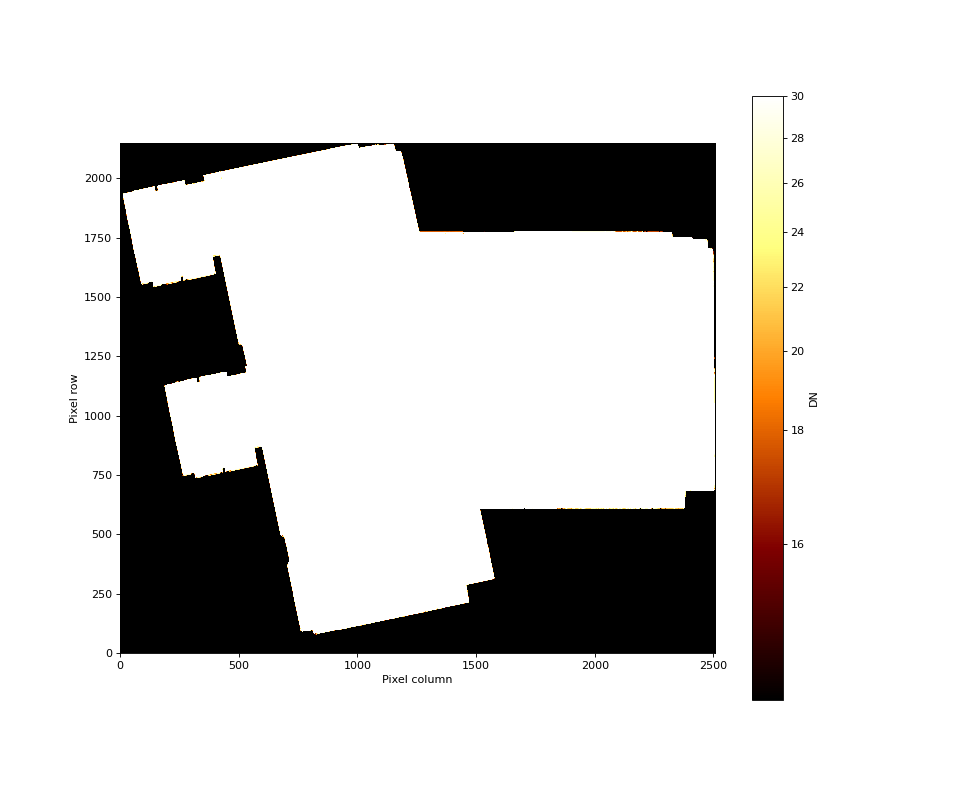

In [27]:
# Look at the mosaic
show_image(miri_mosaic.data, vmin=drange[0], vmax=drange[1], dmap=dmap)

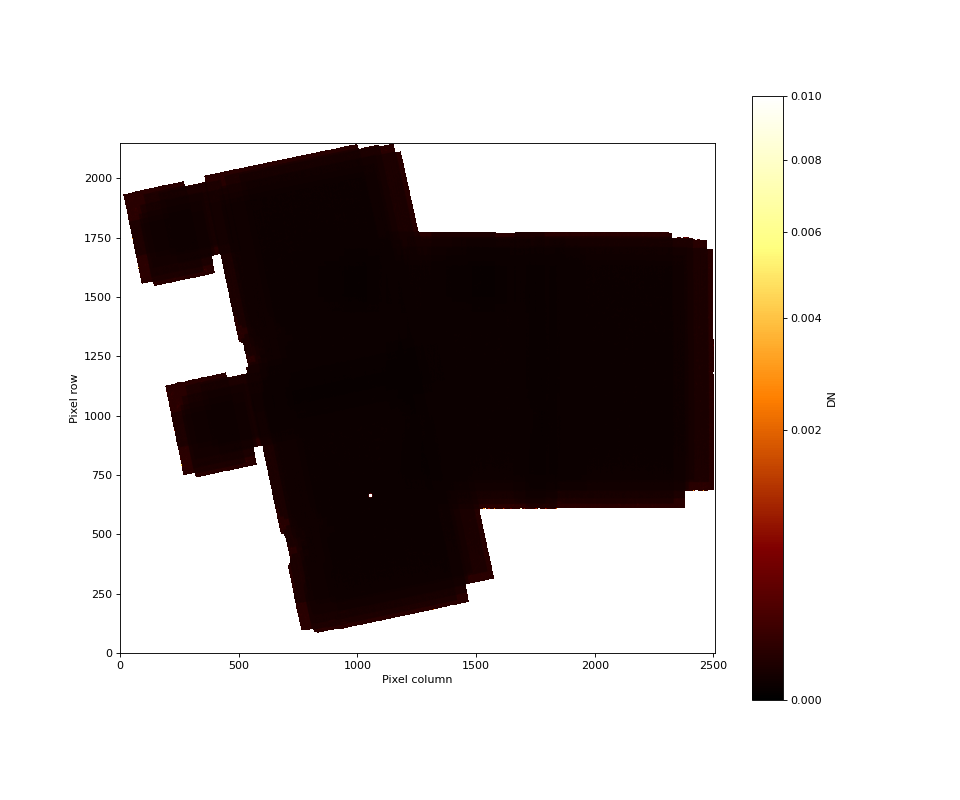

In [28]:
# Look at the mosaic data read noise uncertainties (i.e., coverage map)
show_image(miri_mosaic.var_rnoise, vmin=0.0, vmax=0.01, dmap=dmap)

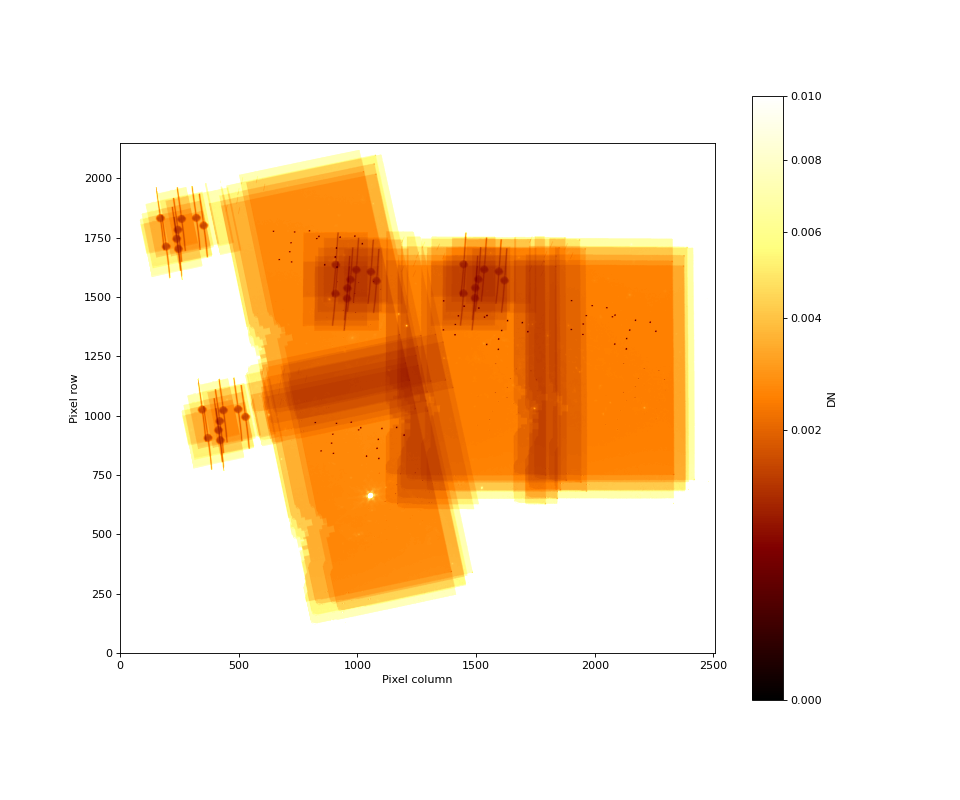

In [29]:
# Look at the mosaic data poisson uncertainties
show_image(miri_mosaic.var_poisson, vmin=0, vmax=0.01, dmap=dmap)

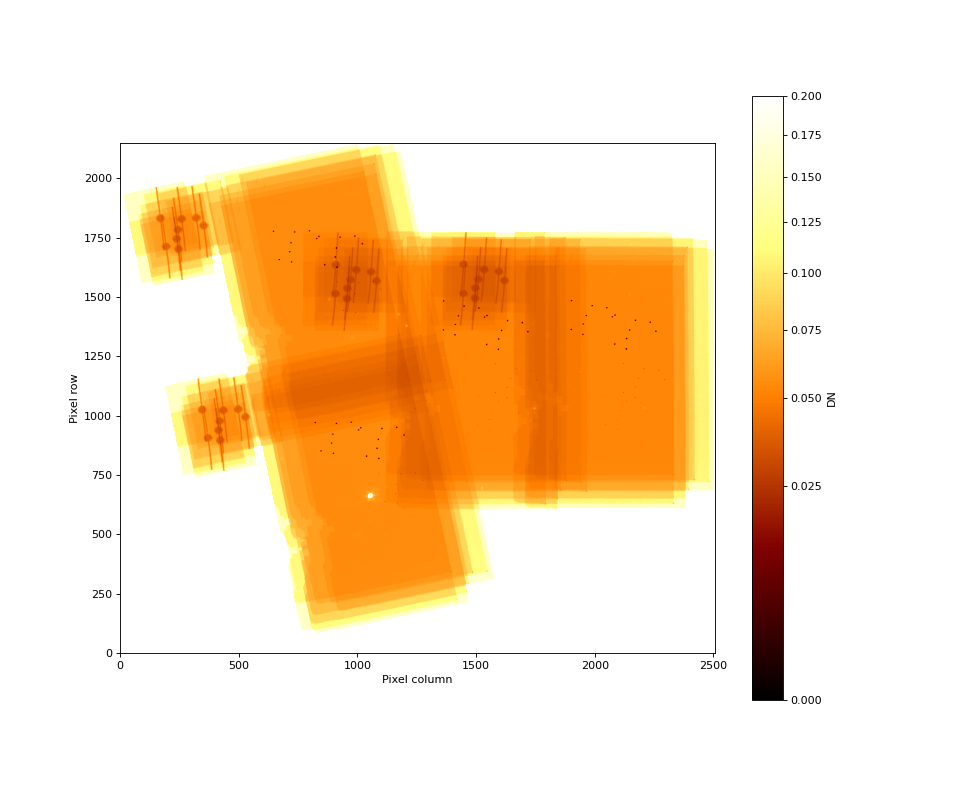

In [30]:
# Look at the mosaic total data uncertainties
show_image(miri_mosaic.err, vmin=0, vmax=0.2, dmap=dmap)

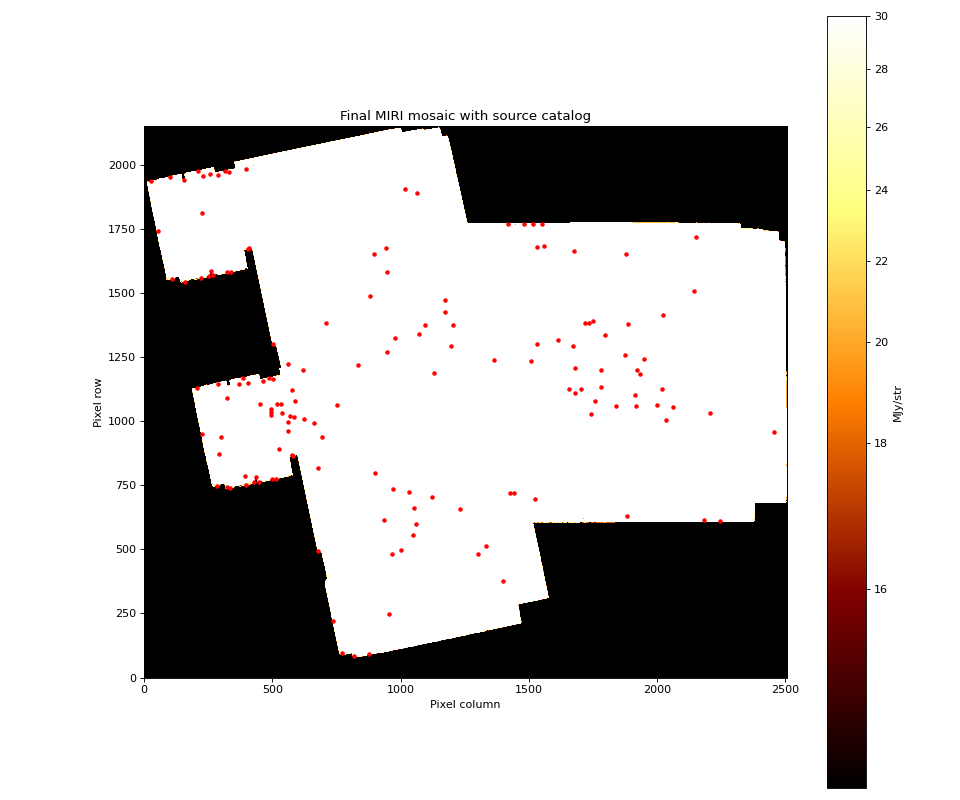

In [31]:
# Show the catalog sources on the mosaic
overlay_catalog(miri_mosaic.data, miri_source_cat, flux_limit=5e-7, vmin=drange[0], vmax=drange[1],
                title='Final MIRI mosaic with source catalog', dmap=dmap)